# **Importing Libraries**

In [1]:
# Setup

# common:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium
from pprint import pprint

# for ML:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#  ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).  
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,plot_precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
#import eli5 # Feature importance evaluation
# For split data in train and test part , And GridSearchCV other use for Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,RandomizedSearchCV

# confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier")
from sklearn.metrics import confusion_matrix,classification_report

# Use For Handle Imbalance Class Problem
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE



# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)


#**Mount the Drive**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Genral Functions** 




*   **plot_roc_curve_many**

> > parameters: fpr,tpr,models 
> > ###### This function take list of False positive rate, true positive rate and models on which we draw ROC curves to visualize the results of models

*  **plot_roc_curve**
>> parameters: fpr,tpr
> > ##### its draw roc curve for single model on given fpr,tpr

* **evaluateModel**
>> parameters: model
>> ##### this method evaluate the method give fpr,tpr,thr 

In [3]:
def plot_roc_curve_many(fpr,tpr,models):
  print("Collective ROC Curve")
  plt.figure(figsize=(20,10))
  plt.plot([0,1],[0,1], color='blue',linestyle='--')
  for idx in range(0,len(models)):
    plt.plot(fpr[idx],tpr[idx],label='ROC '+models[idx])  
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr, color='red',label='ROC')
  plt.plot([0,1],[0,1], color='blue',linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

def evaluateModel(model):
  y_pred = model.predict(X_test)
  probs = model.predict_proba(X_test)
  probs = probs [:,1]
  fpr, tpr, thr = roc_curve(y_test,probs)
  
  print("\nClassification Score",model.score(X_test, y_test))
  print("\nROC Score :",roc_auc_score(y_test,probs))
  print("\nKAPPA\n")
  print(cohen_kappa_score(y_test, y_pred))
  print("\nClassification Report\n")
  print(classification_report(y_test, y_pred))
  print("\nConfusion Matrix\n")
  print(confusion_matrix(y_test, y_pred))
  print("\nROC Curve\n")
  plot_roc_curve(fpr,tpr)
  print("\nPR Curve\n")
  plot_precision_recall_curve(model,X_test,y_test)
  plt.show()
  

# **EDA and Pre-processing**

**Exploratory data analysis (EDA)** is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

**Data preprocessing** is a data mining technique that involves transforming raw data into an understandable format

In [4]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [5]:
pd.set_option('display.max_rows', df.shape[0]+1)
df.describe(include = 'all').transpose()

count unique         top    freq        mean  \
hotel                           119390      2  City Hotel   79330         NaN   
is_canceled                     119390    NaN         NaN     NaN    0.370416   
lead_time                       119390    NaN         NaN     NaN     104.011   
arrival_date_year               119390    NaN         NaN     NaN     2016.16   
arrival_date_month              119390     12      August   13877         NaN   
arrival_date_week_number        119390    NaN         NaN     NaN     27.1652   
arrival_date_day_of_month       119390    NaN         NaN     NaN     15.7982   
stays_in_weekend_nights         119390    NaN         NaN     NaN    0.927599   
stays_in_week_nights            119390    NaN         NaN     NaN      2.5003   
adults                          119390    NaN         NaN     NaN      1.8564   
children                        119386    NaN         NaN     NaN     0.10389   
babies                          119390    NaN         NaN     NaN  0.00794874   
meal                            119390      5          BB   92310         NaN   
country                         118902    177         PRT   48590         NaN   
market_segment                  119390      8   Online TA   56477         NaN   
distribution_channel            119390      5       TA/TO   97870         NaN   
is_repeated_guest               119390    NaN         NaN     NaN   0.0319122   
previous_cancellations          119390    NaN         NaN     NaN   0.0871178   
previous_bookings_not_canceled  119390    NaN         NaN     NaN    0.137097   
reserved_room_type              119390     10           A   85994         NaN   
assigned_room_type              119390     12           A   74053         NaN   
booking_changes                 119390    NaN         NaN     NaN    0.221124   
deposit_type                    119390      3  No Deposit  104641         NaN   
agent                           103050    NaN         NaN     NaN     86.6934   
company                           6797    NaN         NaN     NaN     189.267   
days_in_waiting_list            119390    NaN         NaN     NaN     2.32115   
customer_type                   119390      4   Transient   89613         NaN   
adr                             119390    NaN         NaN     NaN     101.831   
required_car_parking_spaces     119390    NaN         NaN     NaN   0.0625178   
total_of_special_requests       119390    NaN         NaN     NaN    0.571363   
reservation_status              119390      3   Check-Out   75166         NaN   
reservation_status_date         119390    926  2015-10-21    1461         NaN   

                                      std   min    25%     50%   75%   max  
hotel                                 NaN   NaN    NaN     NaN   NaN   NaN  
is_canceled                      0.482918     0      0       0     1     1  
lead_time                         106.863     0     18      69   160   737  
arrival_date_year                0.707476  2015   2016    2016  2017  2017  
arrival_date_month                    NaN   NaN    NaN     NaN   NaN   NaN  
arrival_date_week_number          13.6051     1     16      28    38    53  
arrival_date_day_of_month         8.78083     1      8      16    23    31  
stays_in_weekend_nights          0.998613     0      0       1     2    19  
stays_in_week_nights              1.90829     0      1       2     3    50  
adults                           0.579261     0      2       2     2    55  
children                         0.398561     0      0       0     0    10  
babies                          0.0974362     0      0       0     0    10  
meal                                  NaN   NaN    NaN     NaN   NaN   NaN  
country                               NaN   NaN    NaN     NaN   NaN   NaN  
market_segment                        NaN   NaN    NaN     NaN   NaN   NaN  
distribution_channel                  NaN   NaN    NaN     NaN   NaN   NaN  
is_repeated_guest                0.175767     0   

there are some irrelevant columns that need to be removed before analysis. 

1) 'agent', 'company', and 'distribution_channel' are location specific attributes we do'nt need them because our final goal to build generalized model.

2) 'days_in_waiting_list' and 'arrival_date_year' will not be used in model building because they are irrelevant


In [6]:
df.drop(inplace=True, axis=1, labels=['agent', 'company','distribution_channel','days_in_waiting_list','reservation_status_date',
                                     'arrival_date_year'])

In [7]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
dtype: int64

children and country have missing value

In [8]:
mode = df['country'].mode()
df['country'].fillna(mode[0], inplace=True)

median = df['children'].median()
df['children'].fillna(median, inplace=True)

# Exploratory Data Analysis and Feature Engineering

Number of Guests by country

In [9]:
# get number of acutal guests by country
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())

#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [10]:
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale='Tropic',
                    title="HeatMap of Home country of guests")
guest_map.show()

#### Monthly Customers by Hotel Types

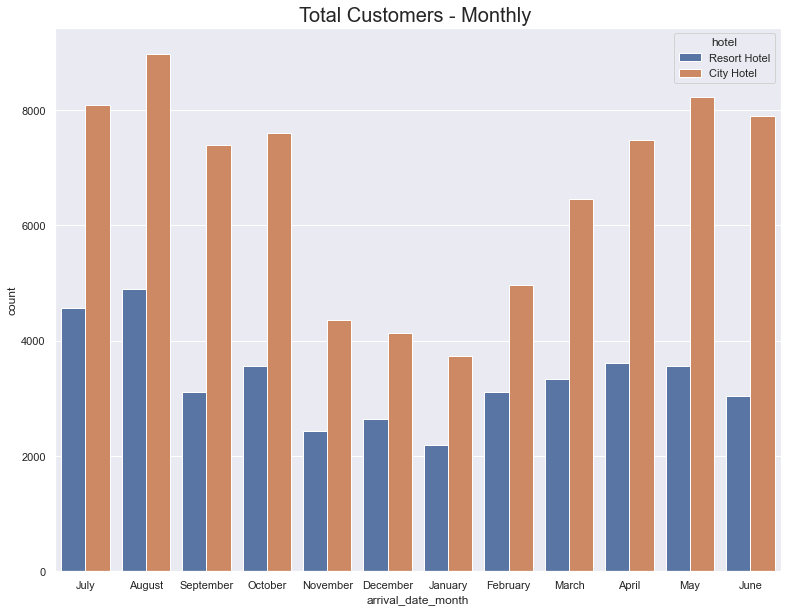

In [11]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = df)

#### Which month have the highest number of cancelations?

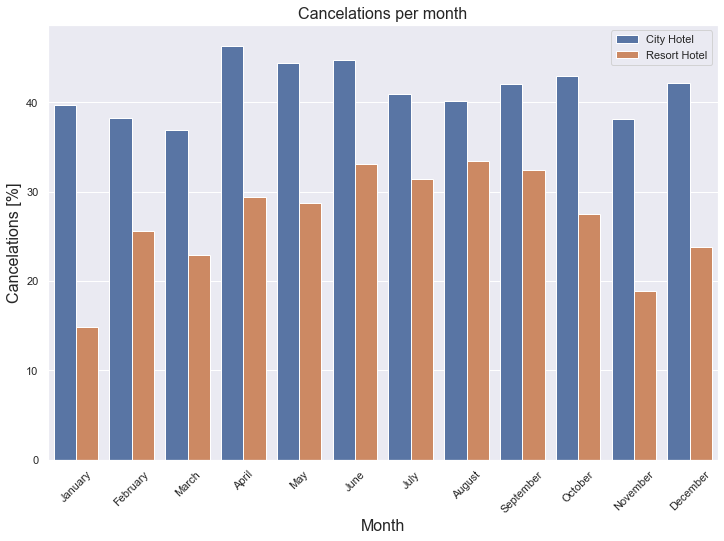

In [12]:
# Create a DateFrame with the relevant data:
res_book_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

How does the price per night vary over the year?

To keep it simple, I'm using the average price per night and person, regardless of the room type and meal.

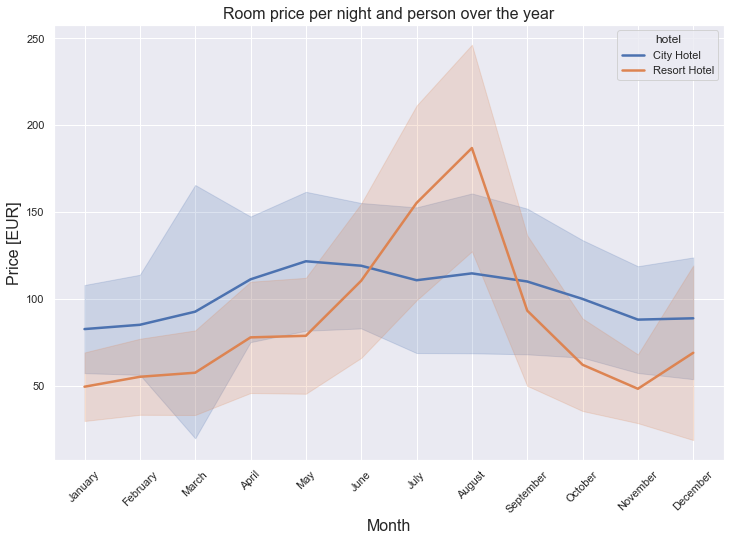

In [13]:
# grab data:
room_prices_mothly = df[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here).
The price of the city hotel varies less and is most expensive during spring and autumn.

#### Which are the most busy month?

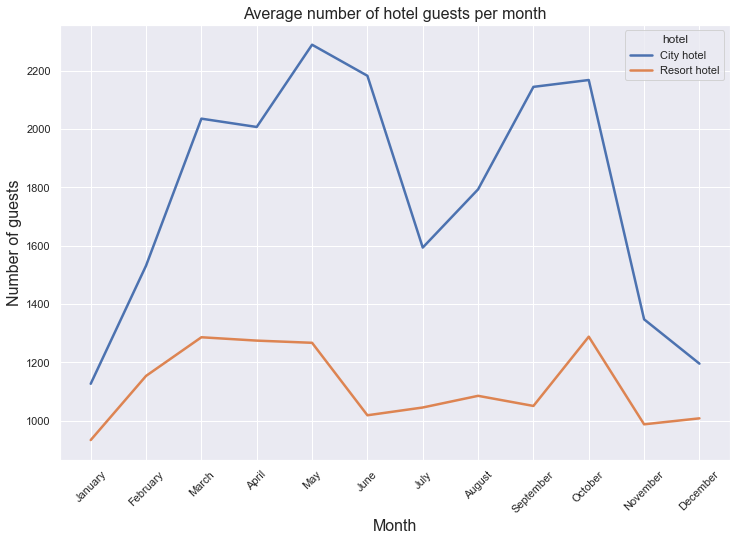

In [14]:
# After cleaning, separate Resort and City hotel
# To know the acutal visitor numbers, only bookings that were not canceled are included. 
rh = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
ch = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

# Create a DateFrame with the relevant data:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

#### Reservation status of the Guests with and without special requests

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



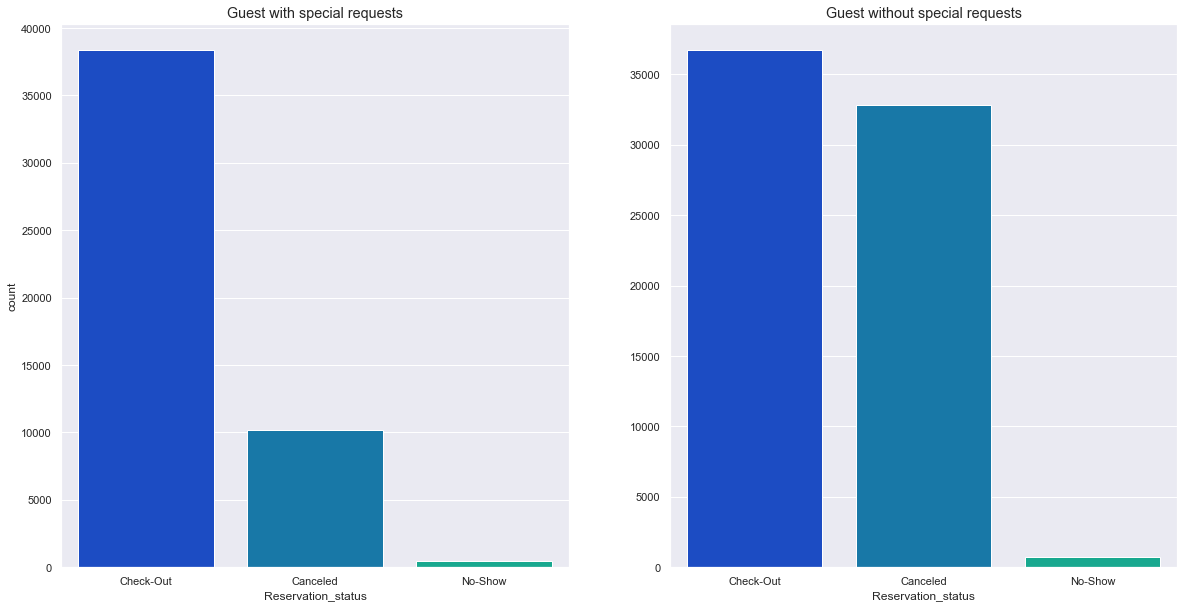

In [15]:
# Parameters
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1, 2)
sns.set(style = 'darkgrid', font_scale = 1.2)

# Special and non Special Request of the guest
special_req = df[df.total_of_special_requests != 0].copy()
non_special_req = df[df.total_of_special_requests == 0].copy()

# Plots
spec = sns.countplot(special_req.reservation_status, ax = ax[0], palette = 'winter')
spec.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

n_spec = sns.countplot(non_special_req.reservation_status, ax = ax[1], palette = 'winter')
n_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status');


#**Encode Columns**

**Encoding** is the process of converting data from one form to another required form.


**Encoding**
>> In encoding we convert TRUE and FALSE to 0,1 and categorical columns in Dependant Varaible X 
>> #### **LabelEncoder**
>> Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.


Missing value verification

In [18]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64

In [19]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [20]:
le = LabelEncoder()
# Transform all categorical columns in Dependant Varaible X
for i in df.columns:
    if df[i].dtype not in ['int64','float64'] :
        df[[i]]=le.fit_transform(df[[i]])
df.dtypes

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



hotel                               int32
is_canceled                         int64
lead_time                           int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
country                             int32
market_segment                      int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int32
assigned_room_type                  int32
booking_changes                     int64
deposit_type                        int32
customer_type                       int32
adr                               float64
required_car_parking_spaces       

**Correlation and Pearson correlation heatmap**

In [21]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

reservation_status                0.917196
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267502
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
booking_changes                   0.144381
hotel                             0.136531
previous_cancellations            0.110133
is_repeated_guest                 0.084793
customer_type                     0.068140
reserved_room_type                0.061282
adults                            0.060017
market_segment                    0.059338
previous_bookings_not_canceled    0.057358
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
meal                              0.017678
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_we

Here, reservation_status seems to be most impactful feature. it's almost equivalent to our target variable "is_canceled" So, It can be better to drop reservation_status column to see how other features can predict.

I will not use arrival_date_week_number, stays_in_weekend_nights, arrival_date_month, and arrival_date_day_of_month since their importances are really low while predicting cancellations.


In [22]:
df = df.drop(columns = ['reservation_status', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_day_of_month', 'arrival_date_month'], axis = 1)

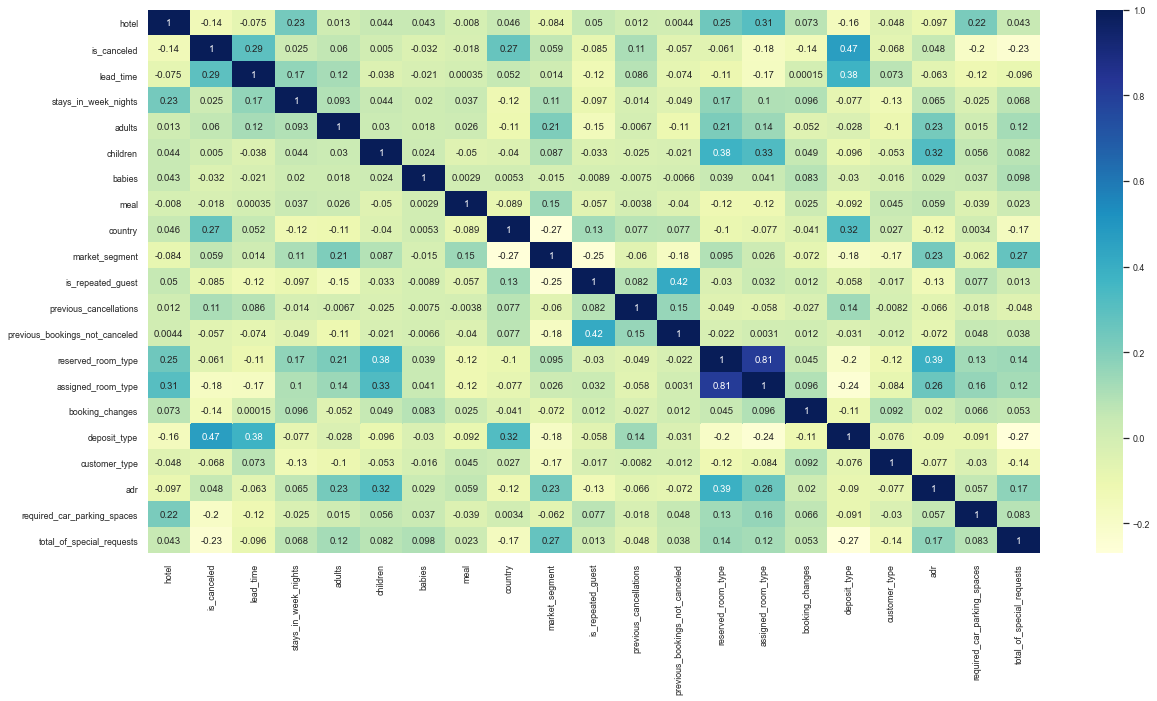

In [23]:
# Pearson Correlation Heatmap
plt.rcParams['figure.figsize'] == [18, 16]
sns.set(font_scale = 0.8)

sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = "YlGnBu");

In [24]:
pd.set_option('display.max_rows', df.shape[0]+1)
df.describe(include = 'all').transpose()

count        mean         std   min    25%  \
hotel                           119390.0    0.335539    0.472181  0.00   0.00   
is_canceled                     119390.0    0.370416    0.482918  0.00   0.00   
lead_time                       119390.0  104.011416  106.863097  0.00  18.00   
stays_in_week_nights            119390.0    2.500302    1.908286  0.00   1.00   
adults                          119390.0    1.856403    0.579261  0.00   2.00   
children                        119390.0    0.103886    0.398555  0.00   0.00   
babies                          119390.0    0.007949    0.097436  0.00   0.00   
meal                            119390.0    0.555742    1.068598  0.00   0.00   
country                         119390.0   93.161789   44.665422  0.00  56.00   
market_segment                  119390.0    4.928101    1.266726  0.00   4.00   
is_repeated_guest               119390.0    0.031912    0.175767  0.00   0.00   
previous_cancellations          119390.0    0.087118    0.844336  0.00   0.00   
previous_bookings_not_canceled  119390.0    0.137097    1.497437  0.00   0.00   
reserved_room_type              119390.0    0.989505    1.697282  0.00   0.00   
assigned_room_type              119390.0    1.329399    1.878762  0.00   0.00   
booking_changes                 119390.0    0.221124    0.652306  0.00   0.00   
deposit_type                    119390.0    0.124893    0.334678  0.00   0.00   
customer_type                   119390.0    2.137323    0.577040  0.00   2.00   
adr                             119390.0  101.831122   50.535790 -6.38  69.29   
required_car_parking_spaces     119390.0    0.062518    0.245291  0.00   0.00   
total_of_special_requests       119390.0    0.571363    0.792798  0.00   0.00   

                                   50%    75%     max  
hotel                            0.000    1.0     1.0  
is_canceled                      0.000    1.0     1.0  
lead_time                       69.000  160.0   737.0  
stays_in_week_nights             2.000    3.0    50.0  
adults                           2.000    2.0    55.0  
children                         0.000    0.0    10.0  
babies                           0.000    0.0    10.0  
meal                             0.000    0.0     4.0  
country                         81.000  135.0   176.0  
market_segment                   5.000    6.0     7.0  
is_repeated_guest                0.000    0.0     1.0  
previous_cancellations           0.000    0.0    26.0  
previous_bookings_not_canceled   0.000    0.0    72.0  
reserved_room_type               0.000    3.0     9.0  
assigned_room_type               0.000    3.0    11.0  
booking_changes                  0.000    0.0    21.0  
deposit_type                     0.000    0.0     2.0  
customer_type                    2.000    2.0     3.0  
adr                             94.575  126.0  5400.0  
required_car_parking_spaces      0.000    0.0     8.0  
total_of_special_requests        0.000    1.0     5.0

# Model Building
Before Model Building step we should check whether our target classes are balanced or not. because if there is imbalance in the classes then we should deal with it as it can effect our classification accuracy

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Cancellation of Bookings: 0 for not cancelled / 1 for Cancelled ')

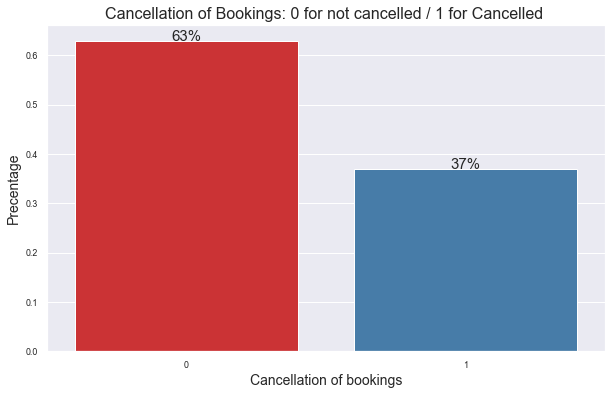

In [25]:
#Ploting barplot for target 
plt.figure(figsize=(10,6))
g = sns.barplot(df['is_canceled'], df['is_canceled'], palette='Set1', estimator=lambda x: len(x) / len(df) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Cancellation of bookings', fontsize=14)
plt.ylabel('Precentage', fontsize=14)
plt.title('Cancellation of Bookings: 0 for not cancelled / 1 for Cancelled ', fontsize=16)

In [26]:


names_1 = ["Logistic",'DT', "Random Forest"]
classifiers_1 = [
    LogisticRegression(solver='lbfgs',random_state=42,class_weight="balanced"),
    DecisionTreeClassifier(random_state=42,class_weight="balanced"),
    RandomForestClassifier(random_state=42,class_weight="balanced")]

***Splitting data into train and test***

In [27]:
X_df = df.loc[:, df.columns != 'is_canceled']
y_df = df['is_canceled']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df,y_df,test_size=0.25,random_state=1)



In [28]:
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89542, 20), (29848, 20), (89542,), (29848,))

In [29]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts))
frequencies

array([[    0,     1],
       [18853, 10995]], dtype=int64)

X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# **Without Class Imbalance Handling**
Now we give a try without removing class imbalance problem and compare results.

I will firstly use GaussianNB, then Logistic Regression, Decision Tree and at the last try with Random Forest. 

Initially, I will go with default parameters of models later I will do hyperparameter tunning 


Testing Classifier : GaussianNB

Classification Score 0.5286116322701688

ROC Score : 0.8069829120236562

KAPPA

0.1850675834987594

Classification Report

              precision    recall  f1-score   support

           0       0.90      0.29      0.43     18853
           1       0.44      0.94      0.60     10995

    accuracy                           0.53     29848
   macro avg       0.67      0.62      0.52     29848
weighted avg       0.73      0.53      0.49     29848


Confusion Matrix

[[ 5407 13446]
 [  624 10371]]

ROC Curve



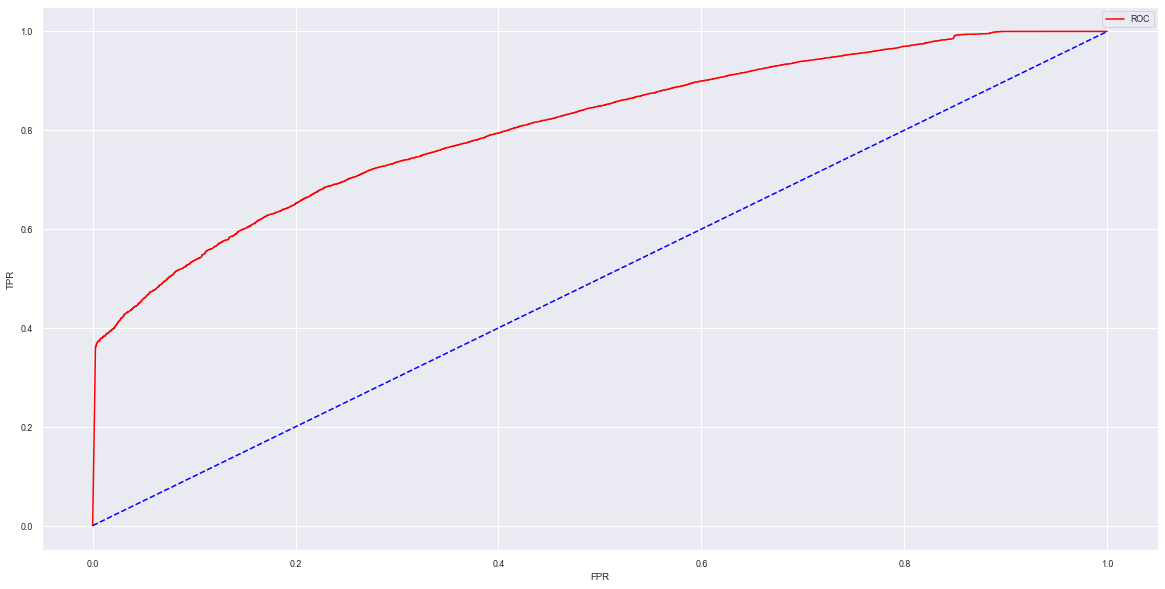


PR Curve



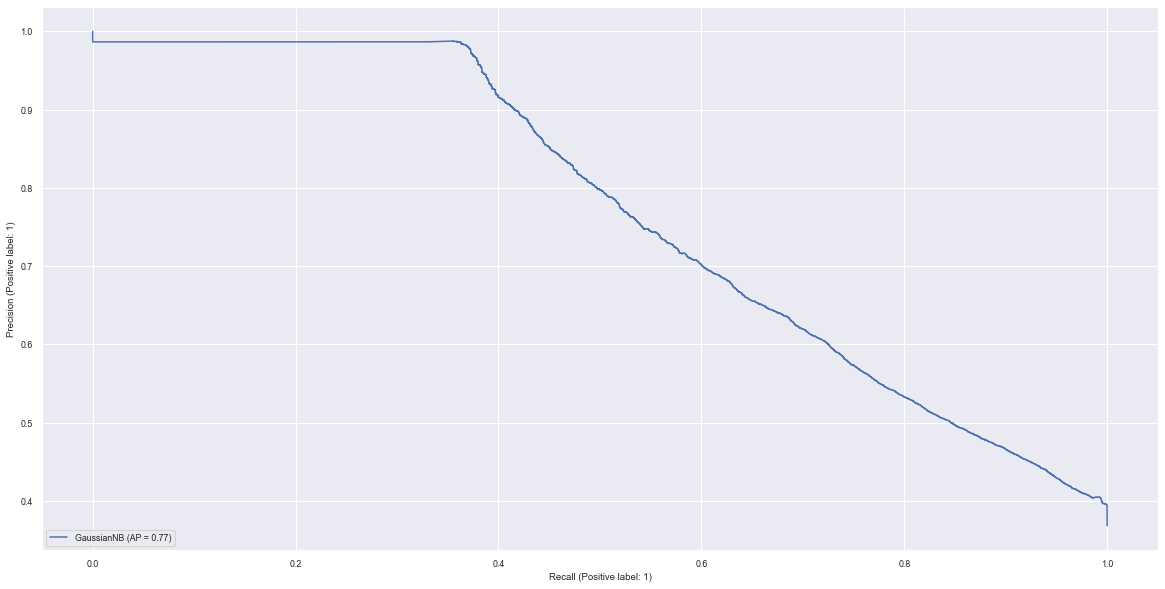

In [30]:
gnb=GaussianNB()

print("\nTesting Classifier : GaussianNB")
gnb.fit(X_train, y_train)
evaluateModel(gnb)

**Logistic Regression**


Testing Classifier : Logistic Regression

Classification Score 0.7777070490485125

ROC Score : 0.83397031681437

KAPPA

0.49781401626816857

Classification Report

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     18853
           1       0.76      0.58      0.66     10995

    accuracy                           0.78     29848
   macro avg       0.77      0.74      0.75     29848
weighted avg       0.78      0.78      0.77     29848


Confusion Matrix

[[16822  2031]
 [ 4604  6391]]

ROC Curve



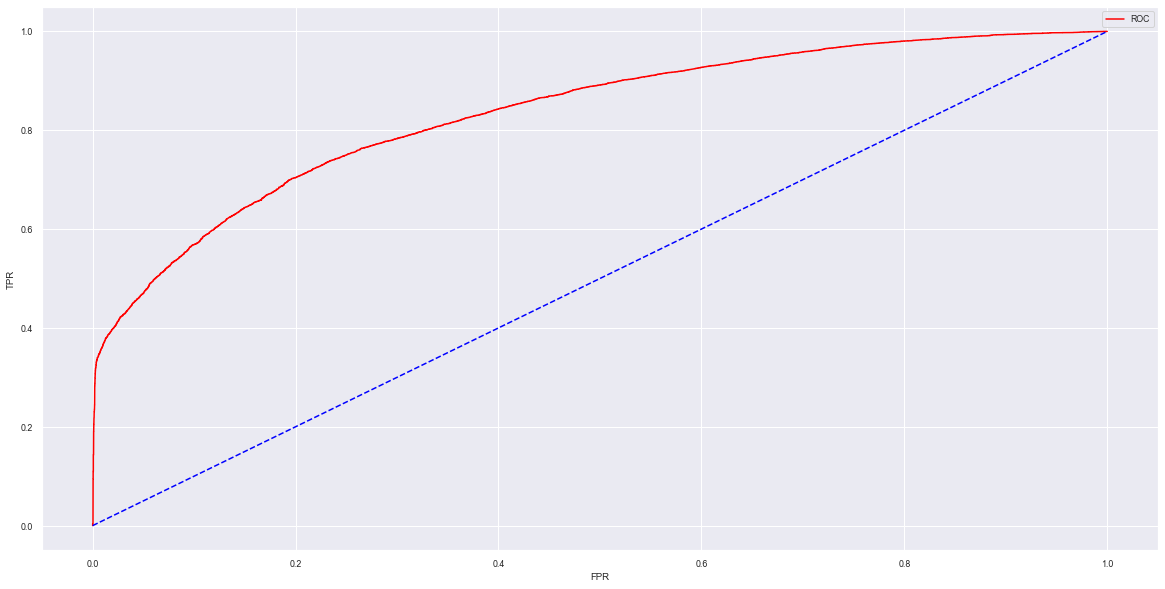


PR Curve



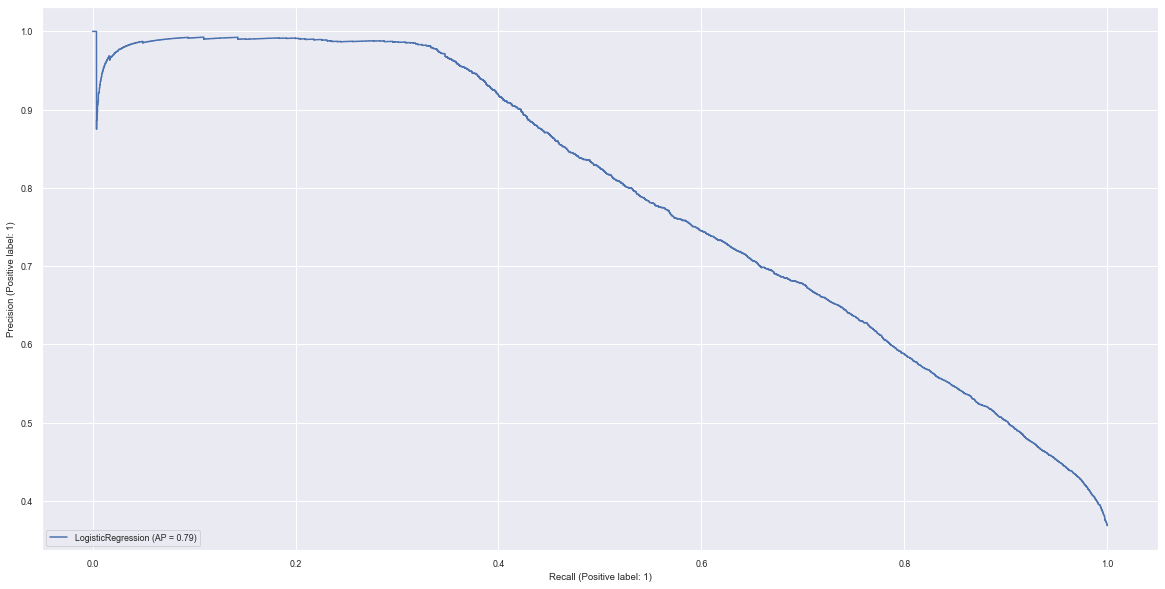

In [31]:
LogR=LogisticRegression(random_state=42,n_jobs=-1)
print("\nTesting Classifier : Logistic Regression")
LogR.fit(X_train, y_train)
evaluateModel(LogR)

**Decision Tree Classifier**


Testing Classifier : Decision Tree Classifier

Classification Score 0.8390511927097293

ROC Score : 0.8317089035253171

KAPPA

0.6554104442936399

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     18853
           1       0.78      0.79      0.78     10995

    accuracy                           0.84     29848
   macro avg       0.83      0.83      0.83     29848
weighted avg       0.84      0.84      0.84     29848


Confusion Matrix

[[16353  2500]
 [ 2304  8691]]

ROC Curve



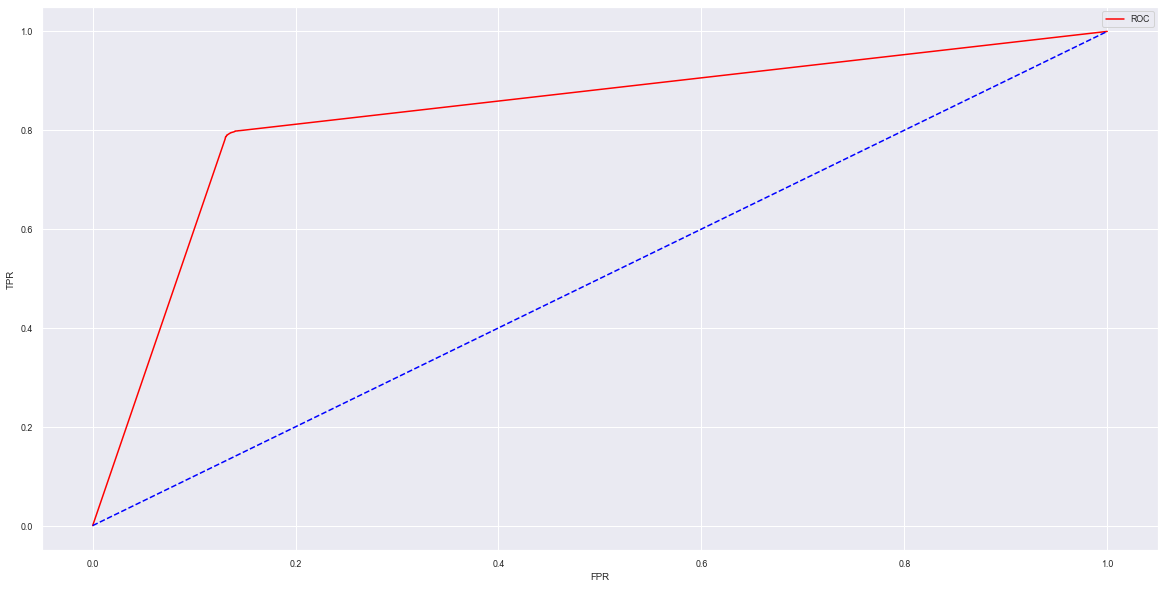


PR Curve



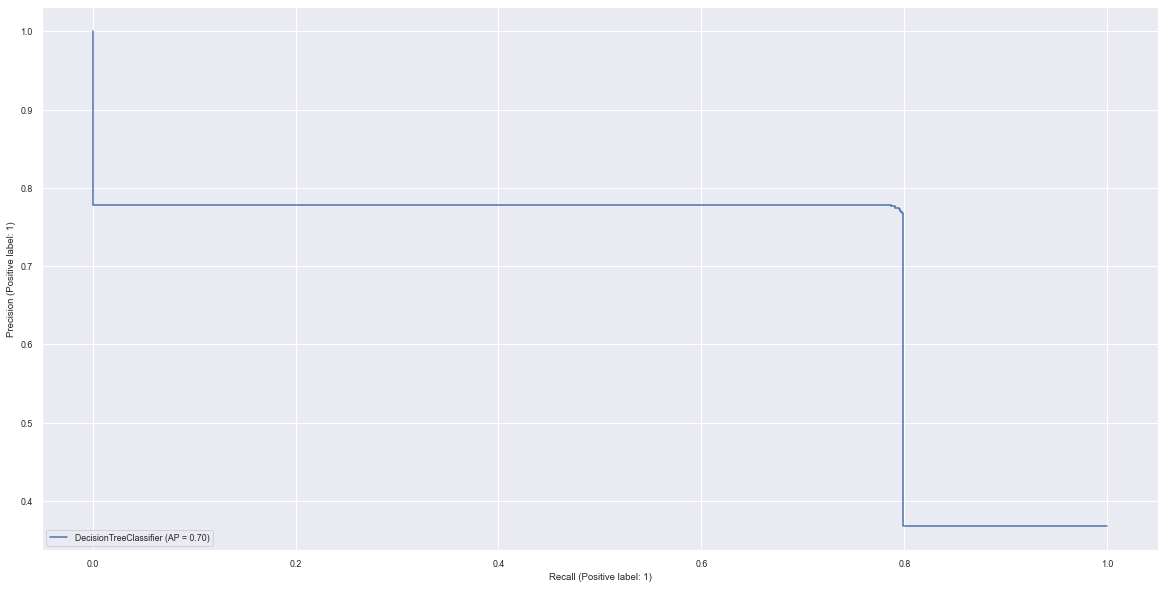

In [32]:
DT=DecisionTreeClassifier(random_state=42)
print("\nTesting Classifier : Decision Tree Classifier")
DT.fit(X_train, y_train)
evaluateModel(DT)

**Random Forest Classifier**


Testing Classifier : Random Forest Classifier

Classification Score 0.8806285178236398

ROC Score : 0.9488532505155189

KAPPA

0.7397533133185534

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18853
           1       0.86      0.80      0.83     10995

    accuracy                           0.88     29848
   macro avg       0.88      0.86      0.87     29848
weighted avg       0.88      0.88      0.88     29848


Confusion Matrix

[[17449  1404]
 [ 2159  8836]]

ROC Curve



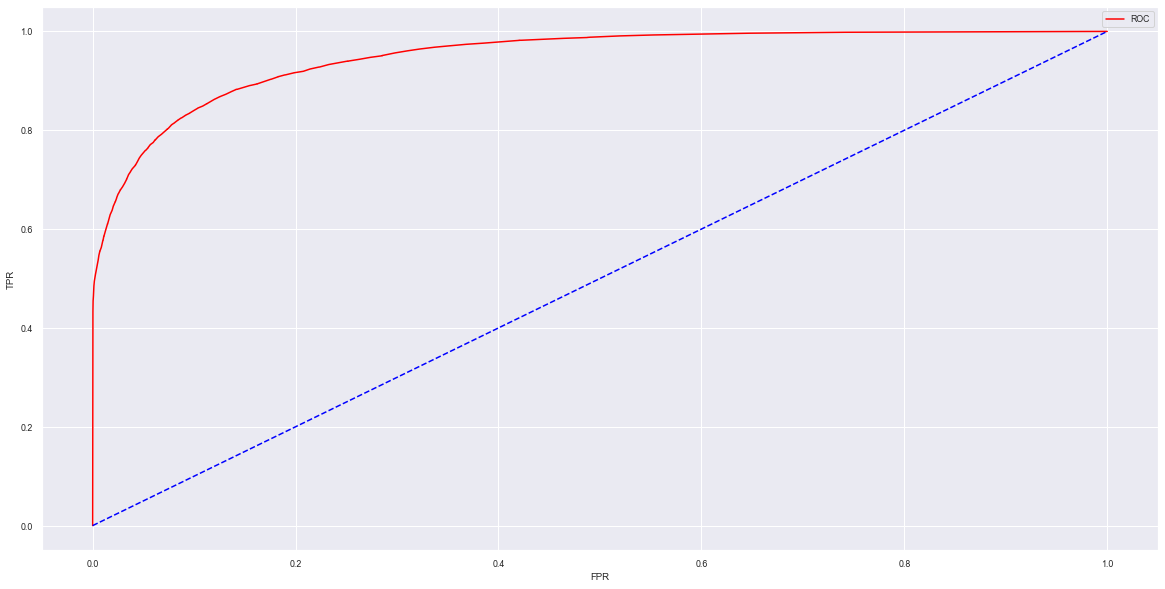


PR Curve



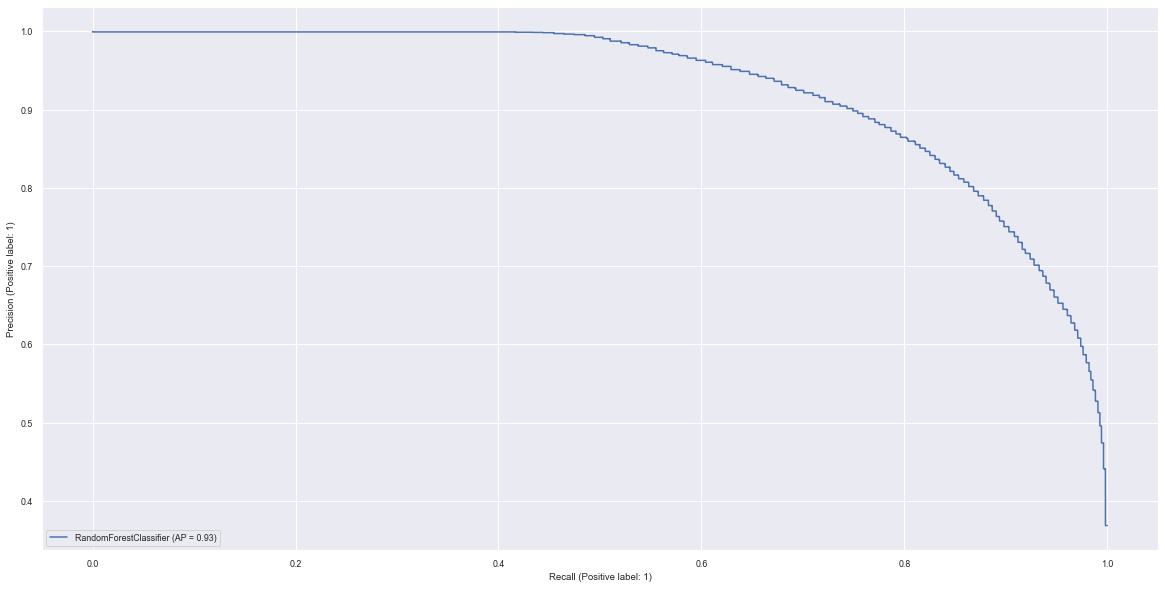

In [33]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
print("\nTesting Classifier : Random Forest Classifier")
rf.fit(X_train, y_train)
evaluateModel(rf)

**Plot all model ROC curve**

In [34]:
names = ['GNB','logestic','DT', "Random Forest"]
classifiers = [
    GaussianNB(),
    LogisticRegression(random_state=42,n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42,n_jobs=-1)]


Testing Classifier  GNB

Testing Classifier  logestic

Testing Classifier  DT

Testing Classifier  Random Forest
Collective ROC Curve


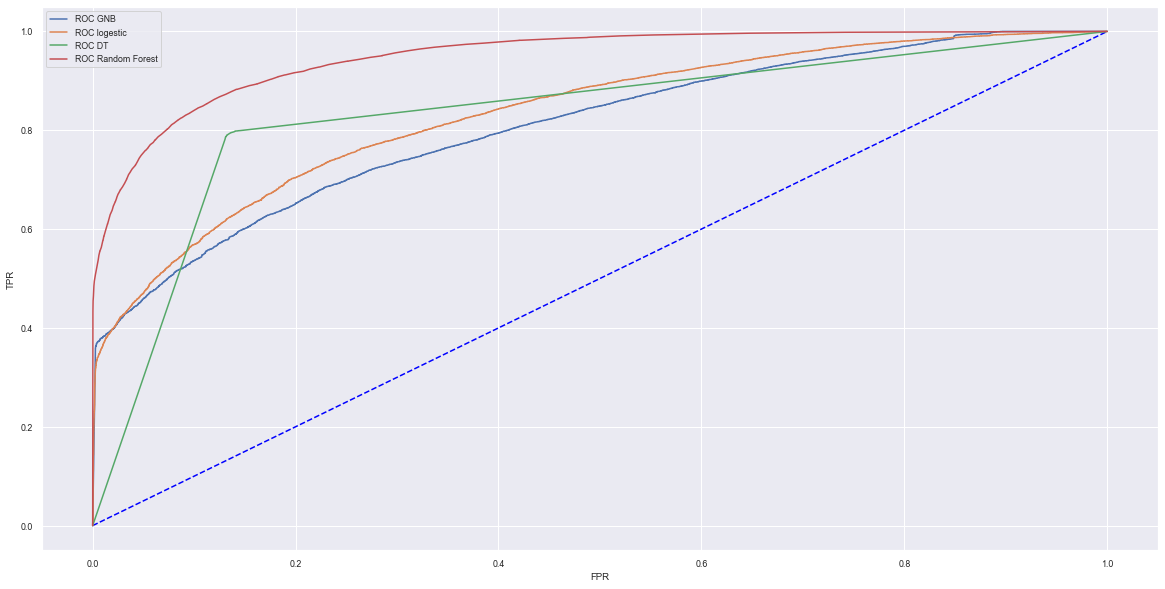

In [35]:
fprs,tprs=[],[]
for name,clf in zip(names,classifiers):
    print("\nTesting Classifier ",name)
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]                                       # fit and predict ====   prediction model                 fit transform ==== encode scalarize
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
#    evaluateModel(clf)
plot_roc_curve_many(fprs,tprs,names)

# **Balanced Resampling (Class 0 Downsample, Class 1 Upsample)**
As we saw our data has impbalance class problem like sample belongs to '0' class are much more than class '1'.

To remove imbalance we downsample class '0' and up sample class '1' and make them equale. then try diffrent models and compare score.

In [36]:
# Merge X_train_df and y_train_df to get a complete dataframe for sampling
merged_df = pd.concat([X_train_df, y_train_df], axis=1)

In [37]:
# Separate class 0 and 1
class_0 = merged_df[merged_df['is_canceled'] == 0]
class_1 = merged_df[merged_df['is_canceled'] == 1] 

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (56313, 21)
class 1: (33229, 21)


In [38]:
# Predict class count
class_count_0, class_count_1 = df['is_canceled'].value_counts()


In [39]:
# Set paramter for under and over sampling of both classes
n_times =2
# According to Count Num of Class_0 we get Sample from Class_1 and assign new class_1_over (For Balncing Class 0 and 1)
class_1_over = class_1.sample(class_count_1*n_times, replace=True)
class_0_under = class_0.sample(class_count_1*n_times, replace=True)

test_balanced = pd.concat([class_1_over, class_0_under], axis=0)

print("Total class of 1 and 0:",test_balanced['is_canceled'].value_counts())

Total class of 1 and 0: 1    88448
0    88448
Name: is_canceled, dtype: int64


In [40]:
test_balanced.shape

(176896, 21)

In [41]:
X_balanced = test_balanced.loc[:, test_balanced.columns != 'is_canceled'].values
y_balanced = test_balanced['is_canceled'].values

In [42]:
X_balanced.shape, y_balanced.shape

((176896, 20), (176896,))


Testing Classifier  GNB

Classification Score 0.5222460466362905

ROC Score : 0.8039905955333271

KAPPA

0.17732437696074344

Classification Report

              precision    recall  f1-score   support

           0       0.90      0.27      0.42     18853
           1       0.43      0.95      0.59     10995

    accuracy                           0.52     29848
   macro avg       0.67      0.61      0.51     29848
weighted avg       0.73      0.52      0.48     29848


Confusion Matrix

[[ 5182 13671]
 [  589 10406]]

ROC Curve



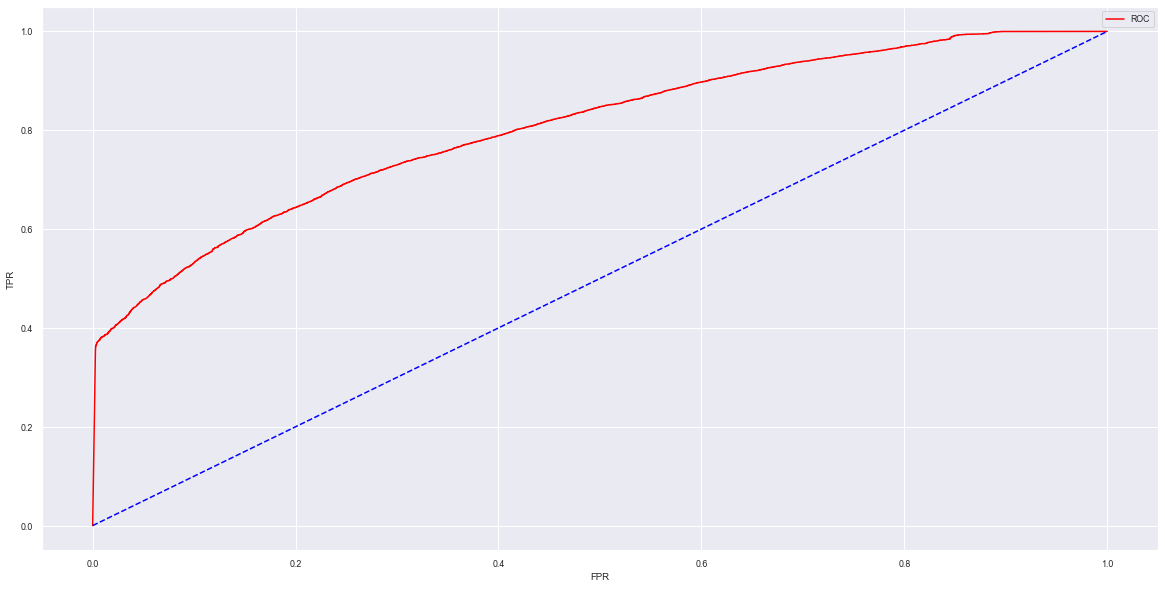


PR Curve



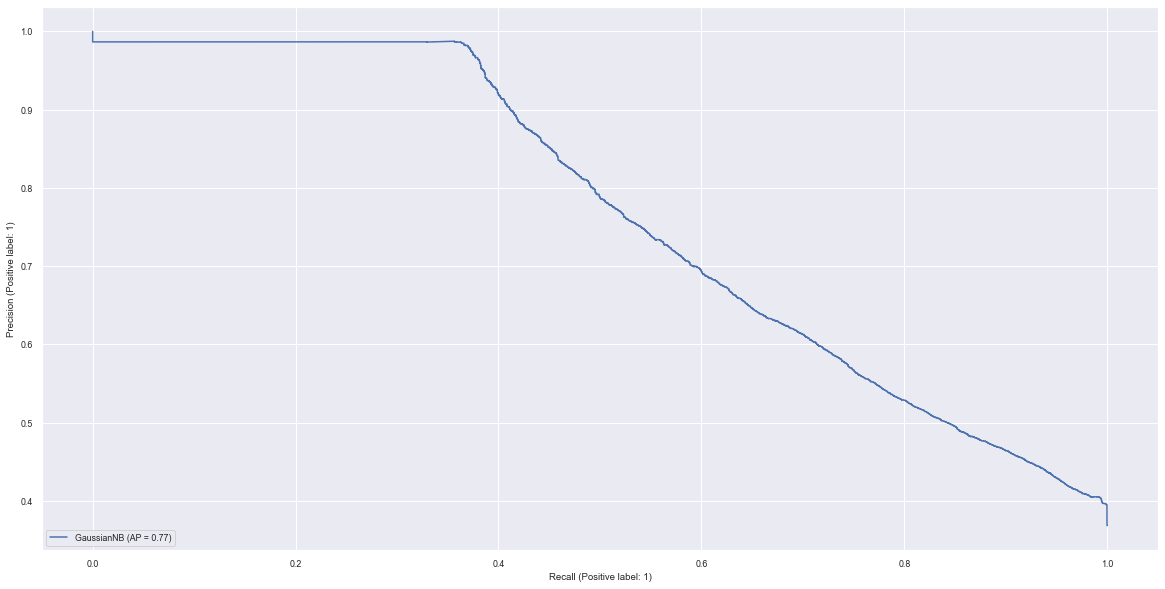


Testing Classifier  logestic

Classification Score 0.7537858482980434

ROC Score : 0.8362563358785513

KAPPA

0.48330833004870877

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     18853
           1       0.65      0.72      0.68     10995

    accuracy                           0.75     29848
   macro avg       0.74      0.75      0.74     29848
weighted avg       0.76      0.75      0.76     29848


Confusion Matrix

[[14545  4308]
 [ 3041  7954]]

ROC Curve



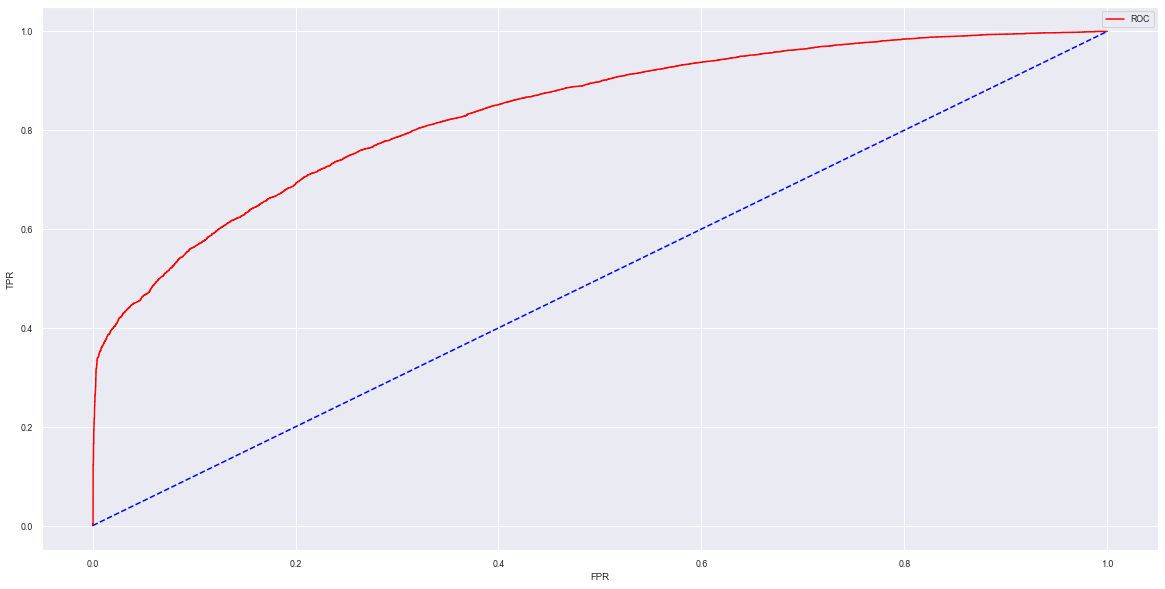


PR Curve



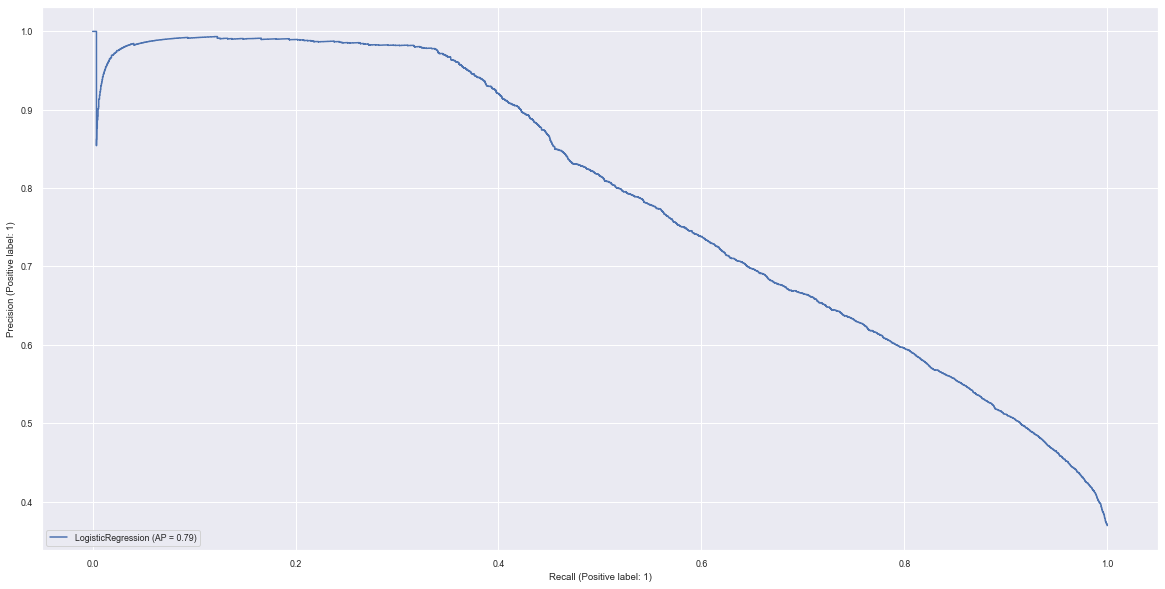


Testing Classifier  DT

Classification Score 0.8298378450817475

ROC Score : 0.8249697119334536

KAPPA

0.637961415690108

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     18853
           1       0.76      0.79      0.77     10995

    accuracy                           0.83     29848
   macro avg       0.82      0.82      0.82     29848
weighted avg       0.83      0.83      0.83     29848


Confusion Matrix

[[16049  2804]
 [ 2275  8720]]

ROC Curve



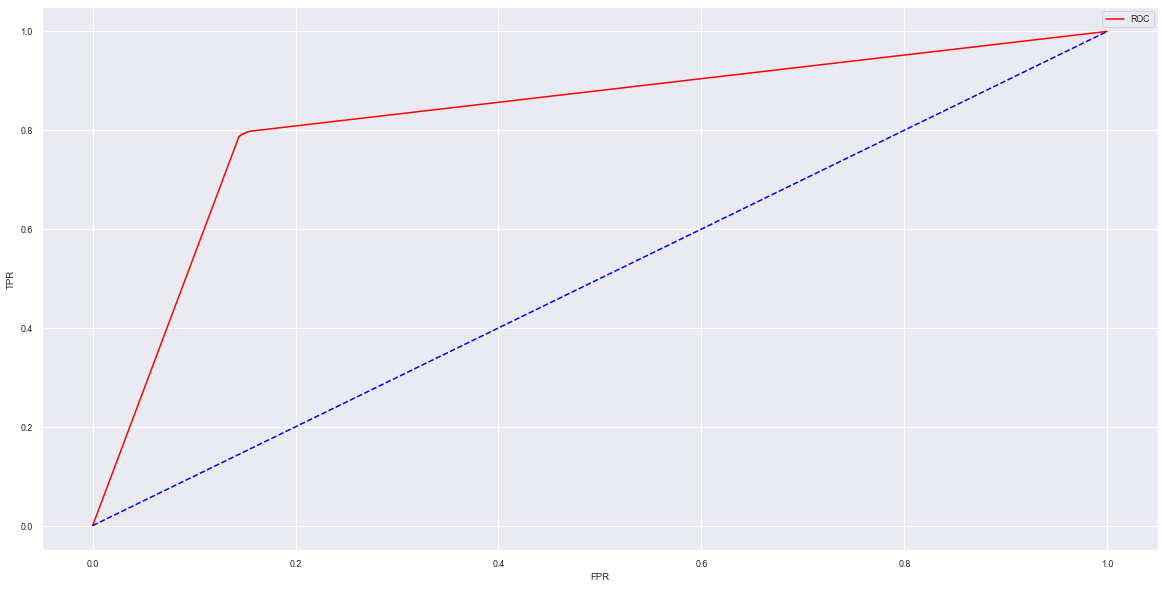


PR Curve



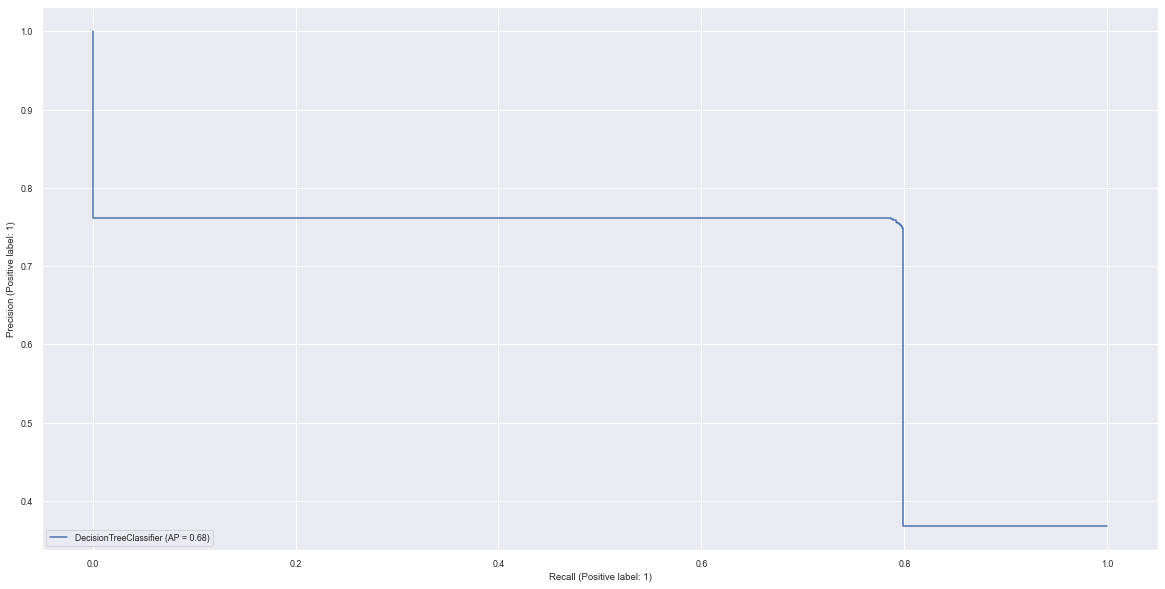


Testing Classifier  Random Forest

Classification Score 0.8729563119807022

ROC Score : 0.9459450148123101

KAPPA

0.7269904319692047

Classification Report

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     18853
           1       0.83      0.83      0.83     10995

    accuracy                           0.87     29848
   macro avg       0.86      0.86      0.86     29848
weighted avg       0.87      0.87      0.87     29848


Confusion Matrix

[[16957  1896]
 [ 1896  9099]]

ROC Curve



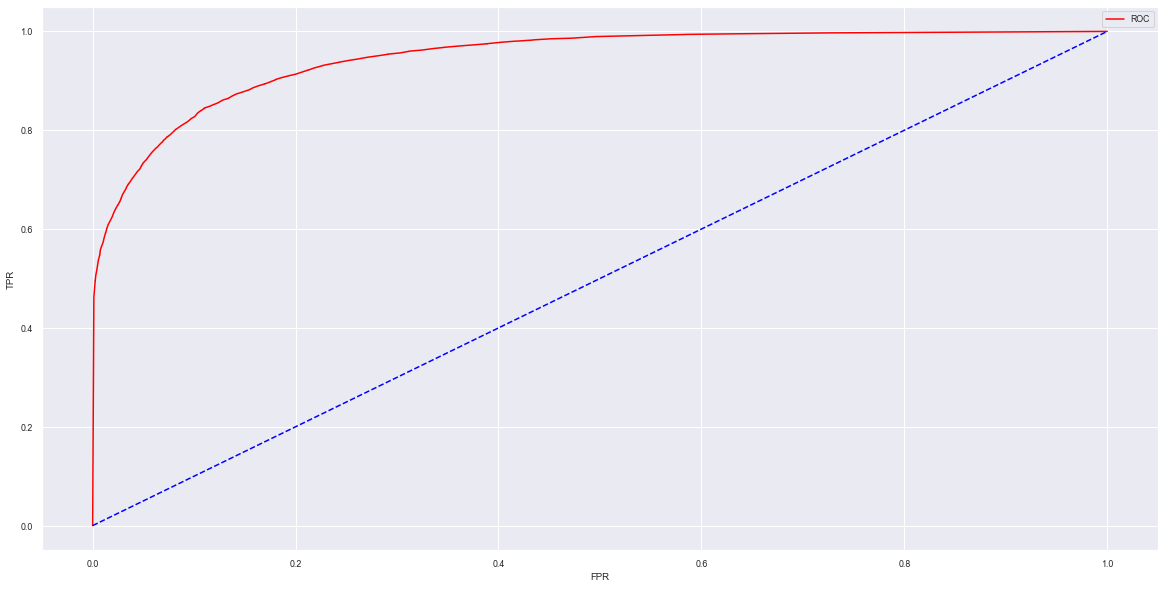


PR Curve



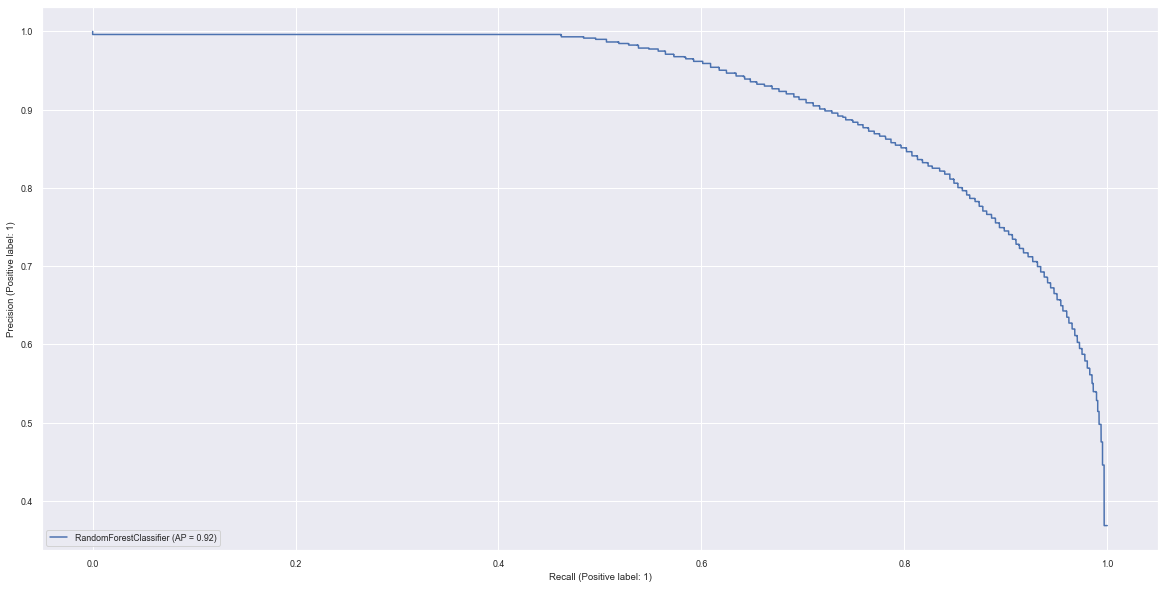

In [43]:
fprs,tprs=[],[]
for name,clf in zip(names,classifiers):
    print("\nTesting Classifier ",name)
    clf.fit(X_balanced, y_balanced)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


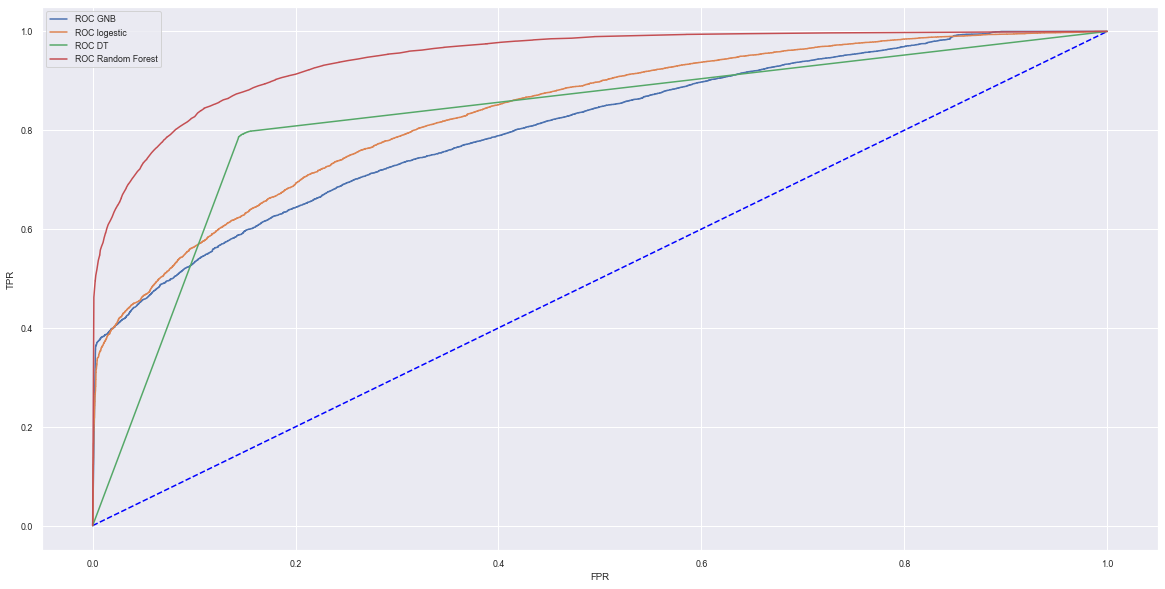

In [44]:
plot_roc_curve_many(fprs,tprs,names)

# **Under Sample Imbalance Technique**

In **under-sampling**, the simplest technique involves removing random records from the majority class

In [45]:
# Set paramter for under and over sampling of both classes
n_times = 2
# According to Count Num of Class_0 we get Sample from Class_1 and assign new class_1_over (For Balncing Class 0 and 1)
class_0_under = class_0.sample(class_count_1*n_times,replace=True)

test_under = pd.concat([class_1, class_0_under], axis=0)

print("Total class of 1 and 0:",test_under['is_canceled'].value_counts())

Total class of 1 and 0: 0    88448
1    33229
Name: is_canceled, dtype: int64


In [46]:
X_under = test_under.loc[:, test_under.columns != 'is_canceled'].values
y_under = test_under['is_canceled'].values
X_under.shape, y_under.shape

((121677, 20), (121677,))


Testing Classifier  GNB

Classification Score 0.5474068614312517

ROC Score : 0.8063356361357504

KAPPA

0.20749428220489718

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.32      0.47     18853
           1       0.45      0.93      0.60     10995

    accuracy                           0.55     29848
   macro avg       0.67      0.63      0.54     29848
weighted avg       0.73      0.55      0.52     29848


Confusion Matrix

[[ 6104 12749]
 [  760 10235]]

ROC Curve



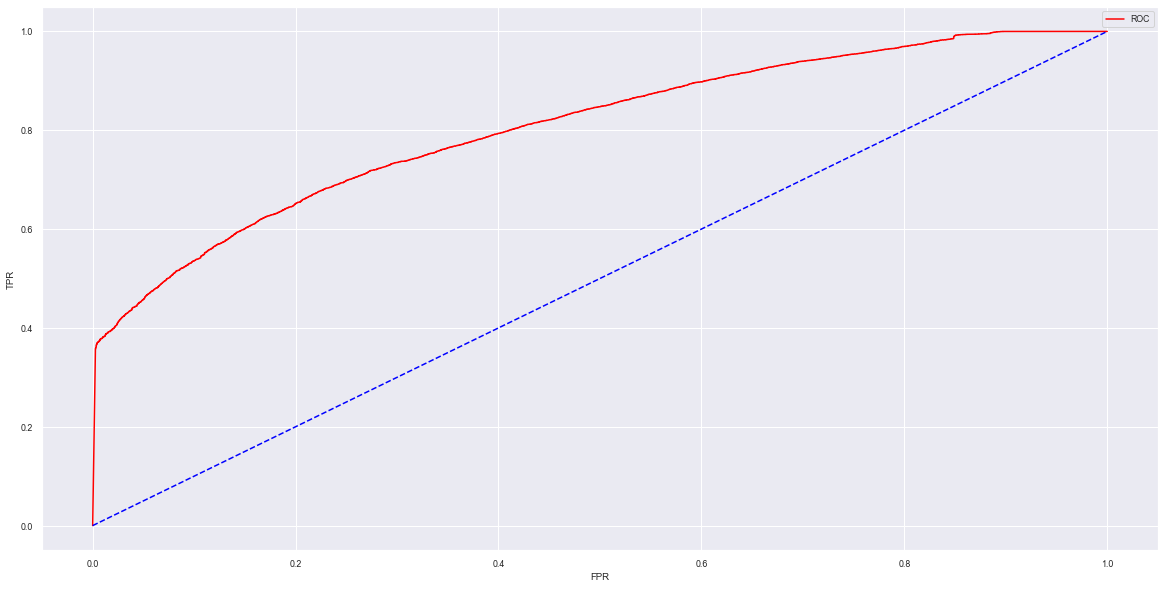


PR Curve



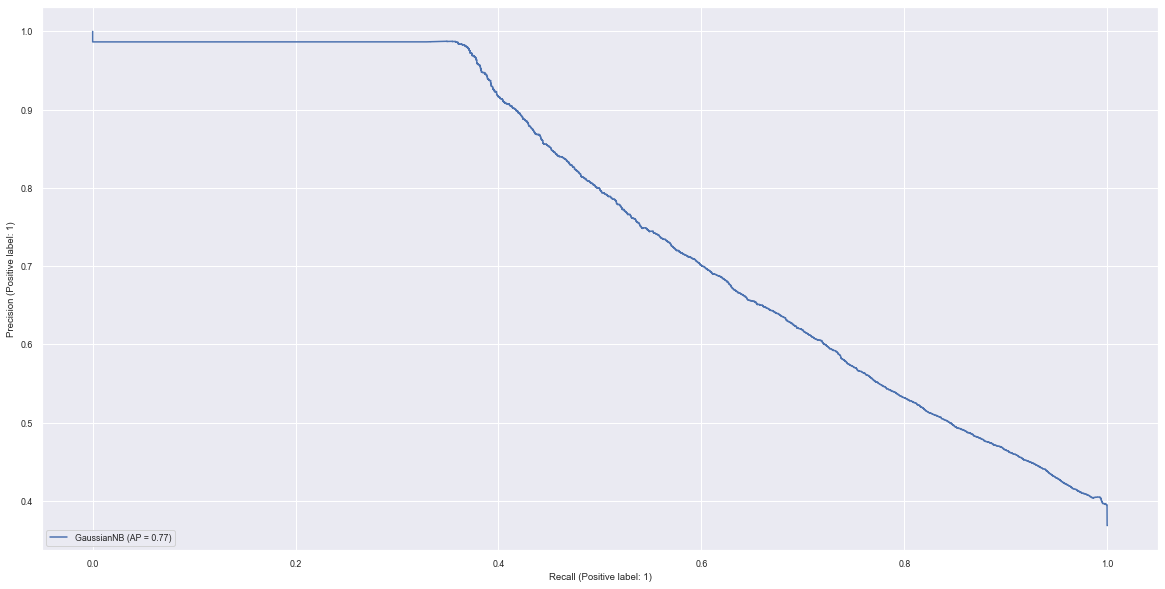


Testing Classifier  logestic

Classification Score 0.7673880997051729

ROC Score : 0.8221581071446067

KAPPA

0.4501806188846075

Classification Report

              precision    recall  f1-score   support

           0       0.75      0.94      0.84     18853
           1       0.83      0.47      0.60     10995

    accuracy                           0.77     29848
   macro avg       0.79      0.70      0.72     29848
weighted avg       0.78      0.77      0.75     29848


Confusion Matrix

[[17778  1075]
 [ 5868  5127]]

ROC Curve



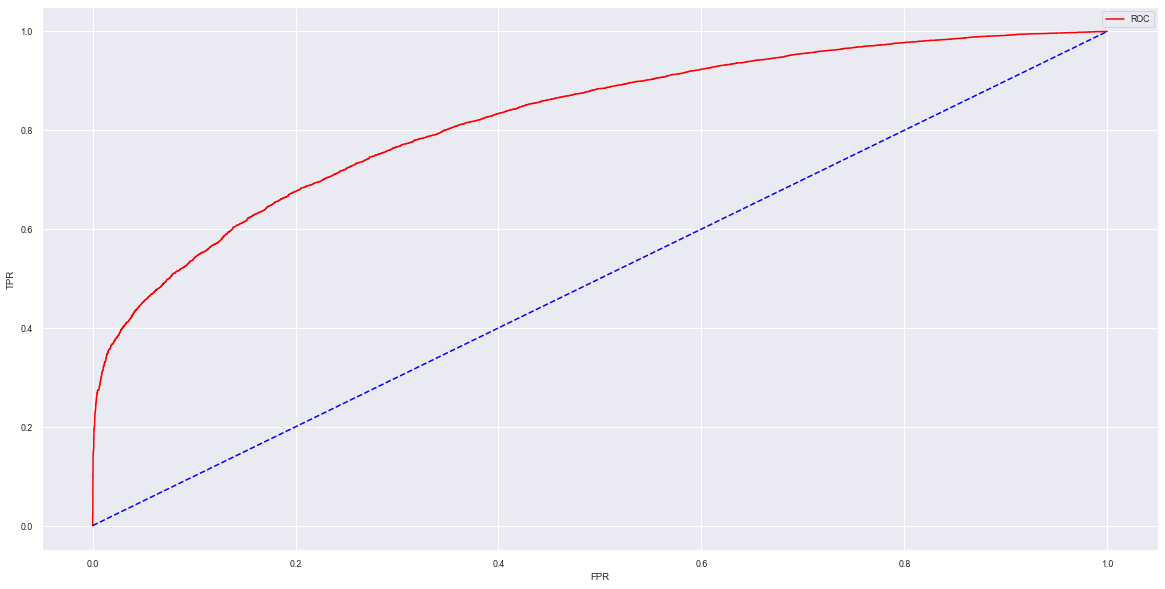


PR Curve



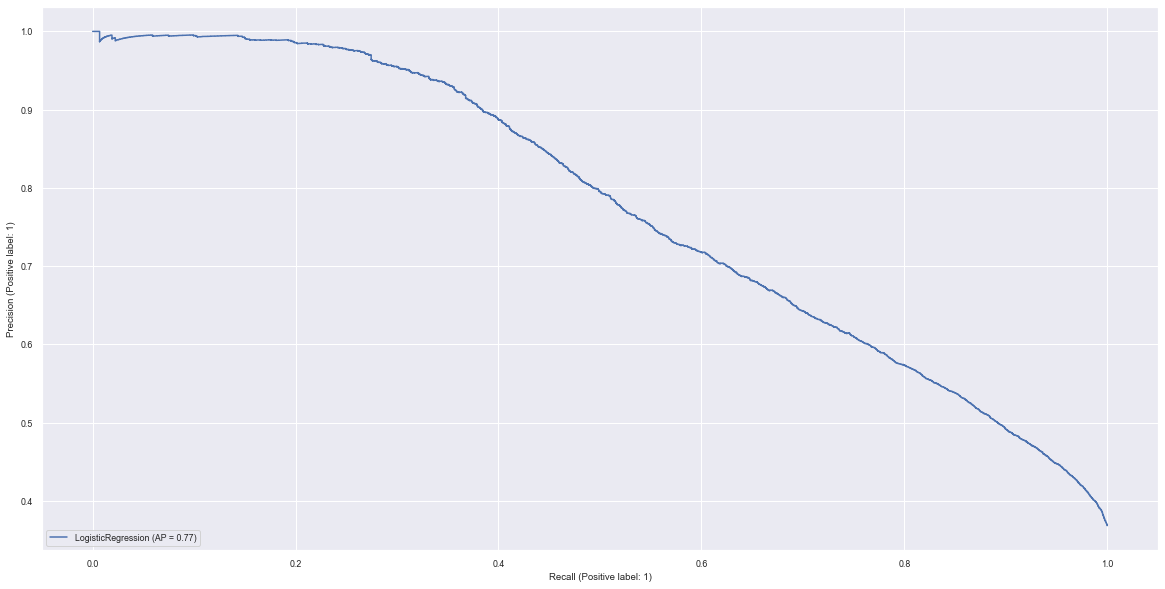


Testing Classifier  DT

Classification Score 0.833154650227821

ROC Score : 0.8316197862850581

KAPPA

0.64731490579066

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.84      0.86     18853
           1       0.75      0.81      0.78     10995

    accuracy                           0.83     29848
   macro avg       0.82      0.83      0.82     29848
weighted avg       0.84      0.83      0.83     29848


Confusion Matrix

[[15925  2928]
 [ 2052  8943]]

ROC Curve



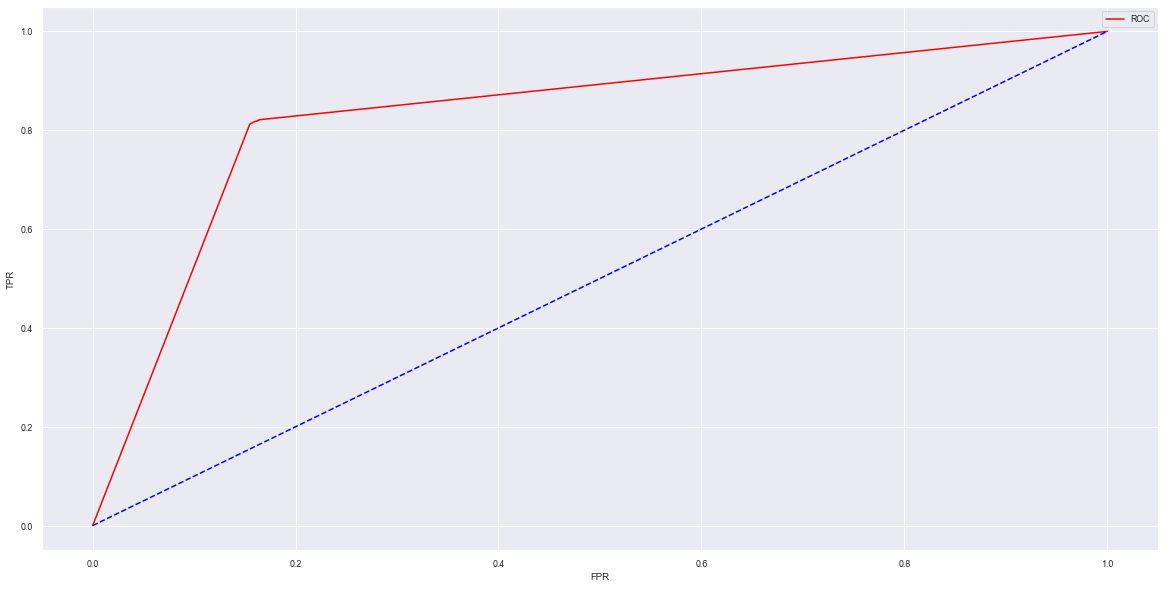


PR Curve



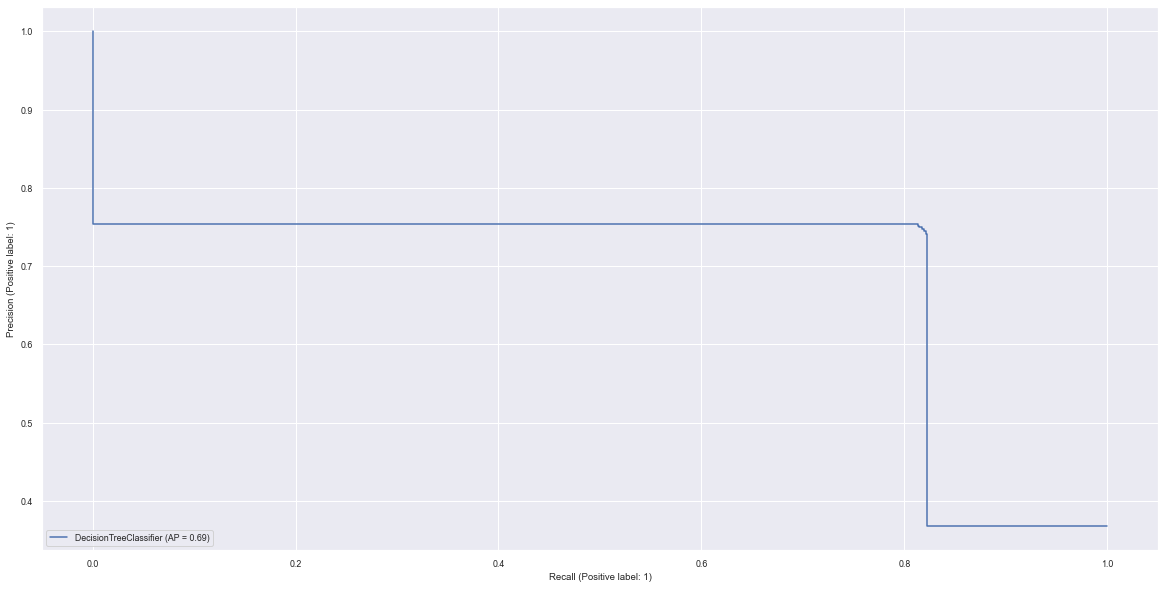


Testing Classifier  Random Forest

Classification Score 0.8793554006968641

ROC Score : 0.947152695007763

KAPPA

0.7371495898827604

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     18853
           1       0.86      0.80      0.83     10995

    accuracy                           0.88     29848
   macro avg       0.87      0.86      0.87     29848
weighted avg       0.88      0.88      0.88     29848


Confusion Matrix

[[17413  1440]
 [ 2161  8834]]

ROC Curve



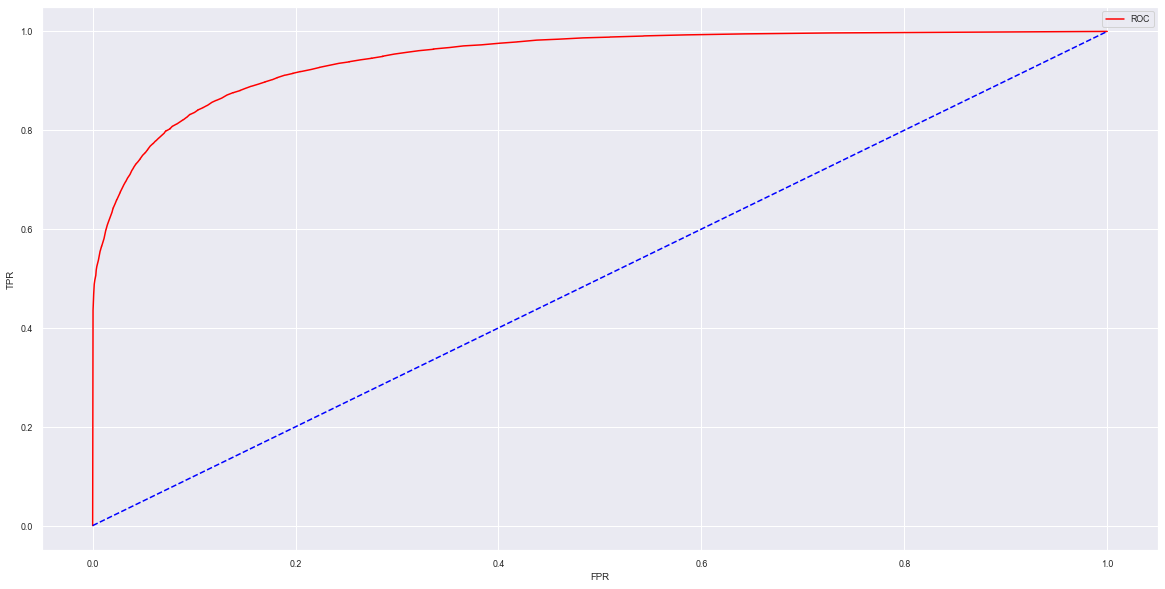


PR Curve



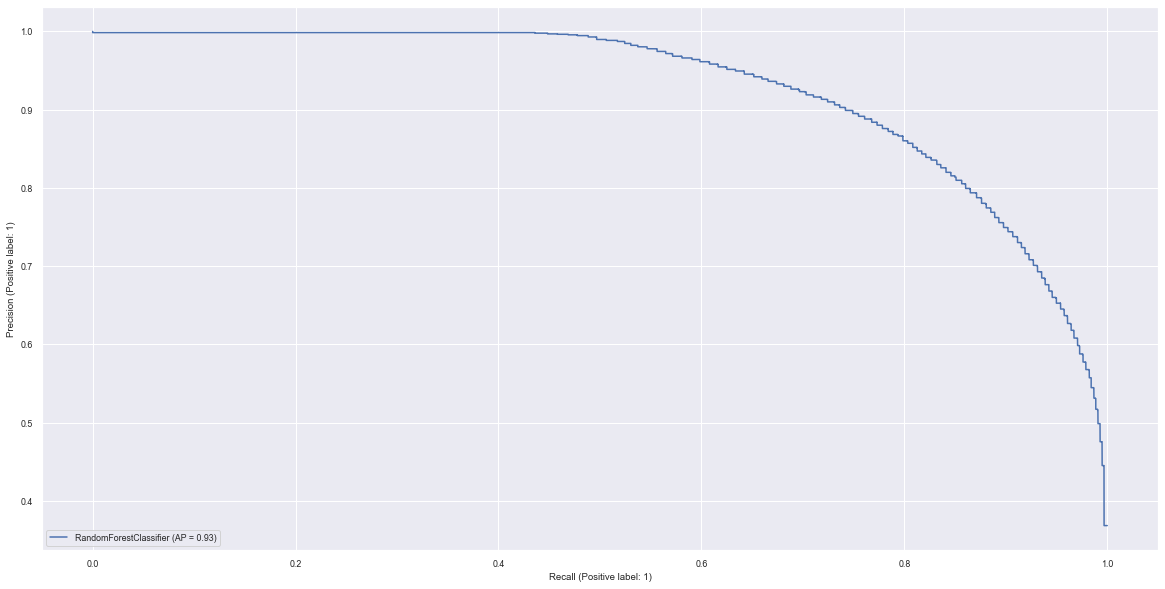

In [47]:
fprs,tprs=[],[]
for name,clf in zip(names,classifiers):
    print("\nTesting Classifier ",name)
    clf.fit(X_under, y_under)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


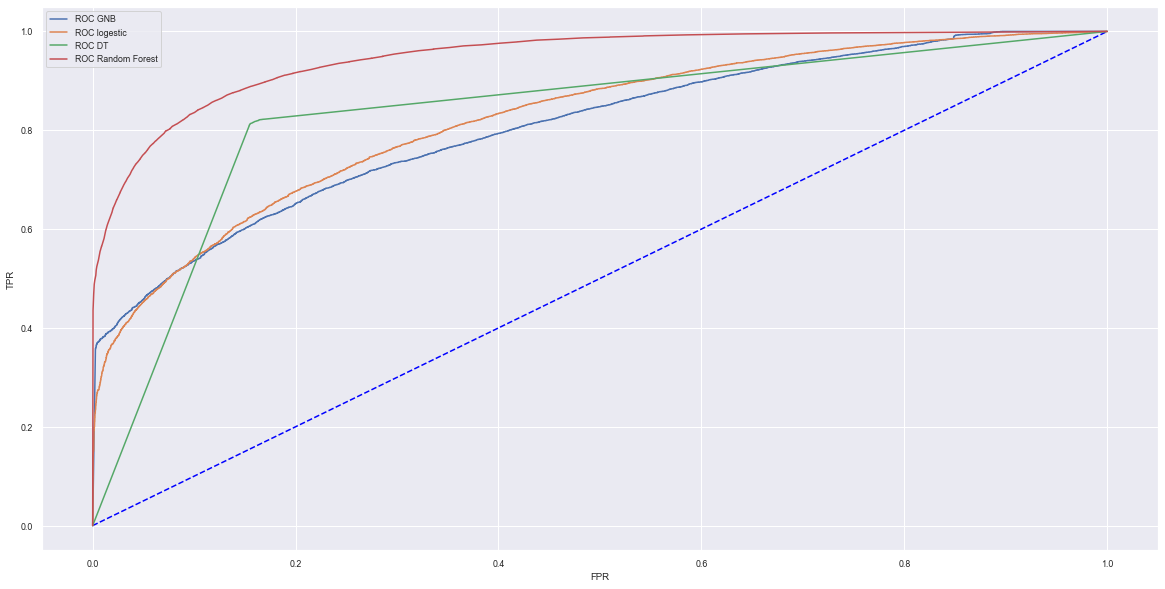

In [48]:
plot_roc_curve_many(fprs,tprs,names)

## Class_weight = balanced

as we have seen GausianNB is least performing model so we drop it at this stage and continue with others with class_weight balanced


Testing Classifier  Logistic


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Classification Score 0.7536518359689092

ROC Score : 0.8382048643405537

KAPPA

0.48434426028450484

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     18853
           1       0.65      0.73      0.69     10995

    accuracy                           0.75     29848
   macro avg       0.74      0.75      0.74     29848
weighted avg       0.76      0.75      0.76     29848


Confusion Matrix

[[14474  4379]
 [ 2974  8021]]

ROC Curve



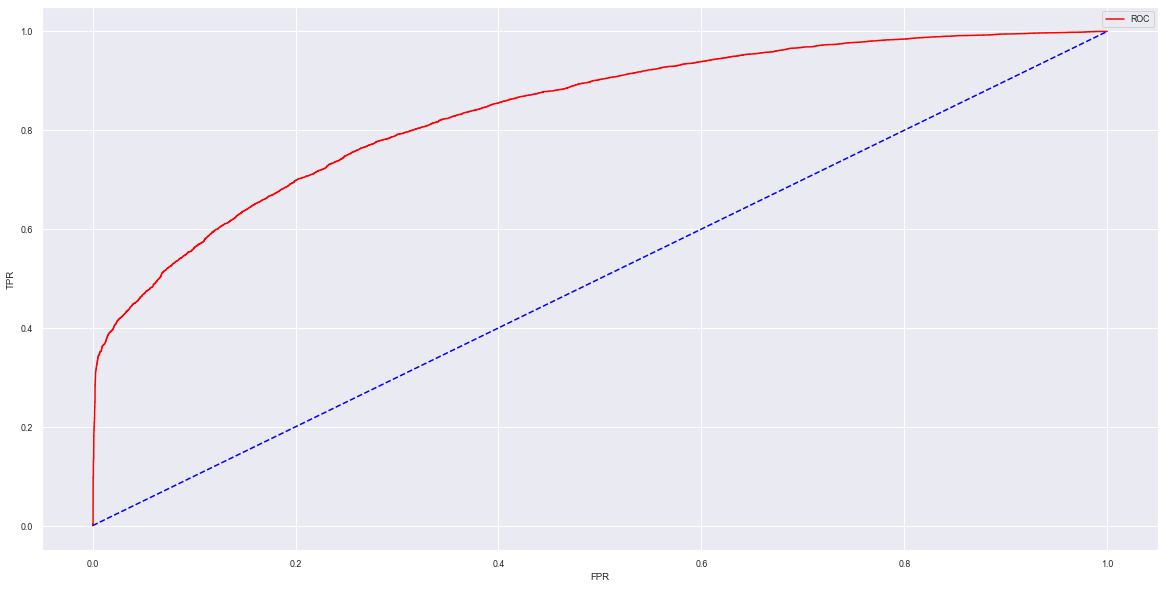


PR Curve



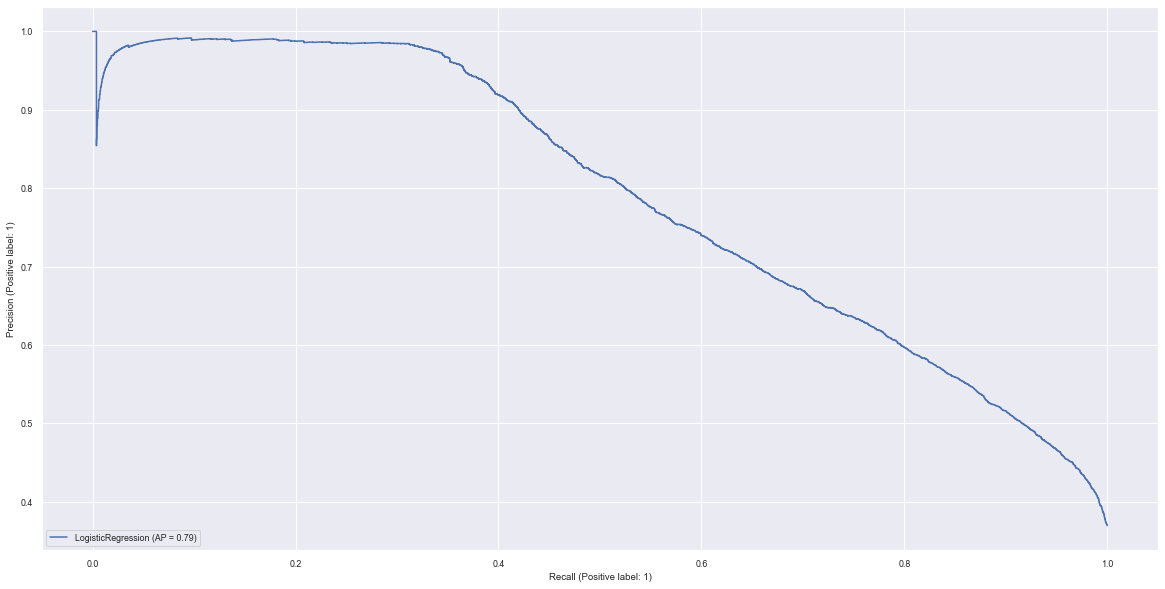


Testing Classifier  DT

Classification Score 0.8340257303671937

ROC Score : 0.8318563789778542

KAPPA

0.6487501996620304

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     18853
           1       0.76      0.81      0.78     10995

    accuracy                           0.83     29848
   macro avg       0.82      0.83      0.82     29848
weighted avg       0.84      0.83      0.84     29848


Confusion Matrix

[[15969  2884]
 [ 2070  8925]]

ROC Curve



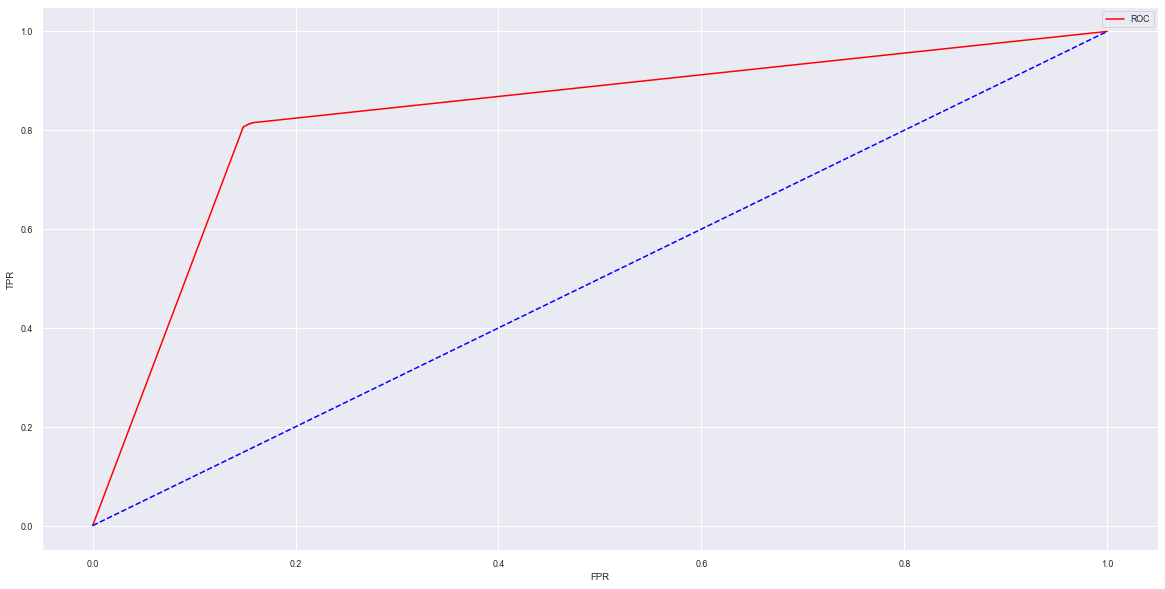


PR Curve



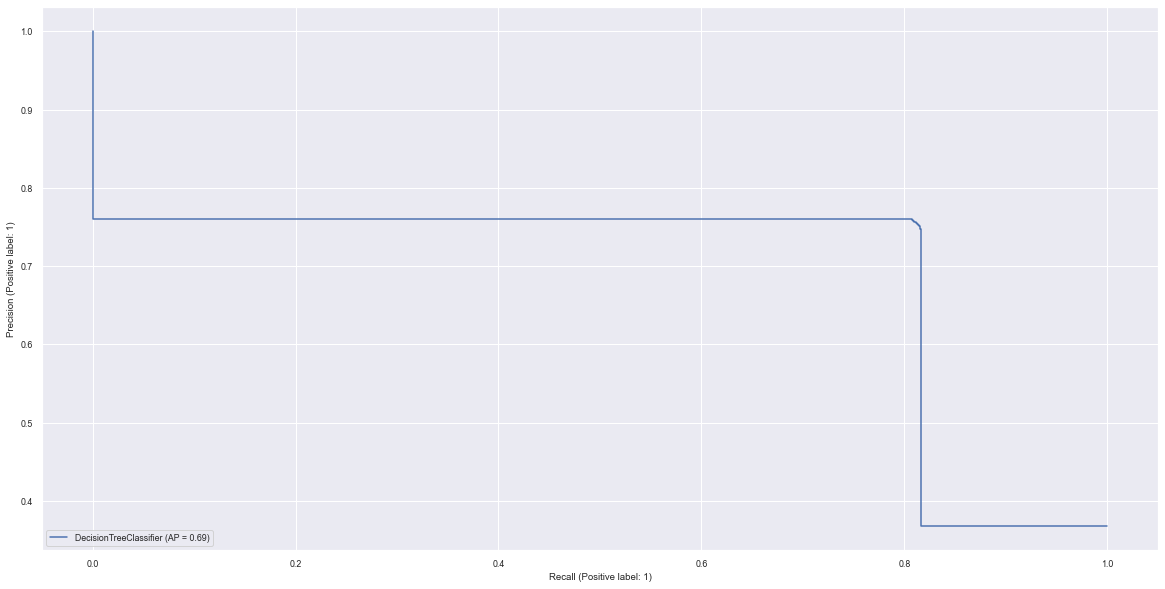


Testing Classifier  Random Forest

Classification Score 0.8778477619941034

ROC Score : 0.9472401720238197

KAPPA

0.7336140362489306

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     18853
           1       0.86      0.80      0.83     10995

    accuracy                           0.88     29848
   macro avg       0.87      0.86      0.87     29848
weighted avg       0.88      0.88      0.88     29848


Confusion Matrix

[[17415  1438]
 [ 2208  8787]]

ROC Curve



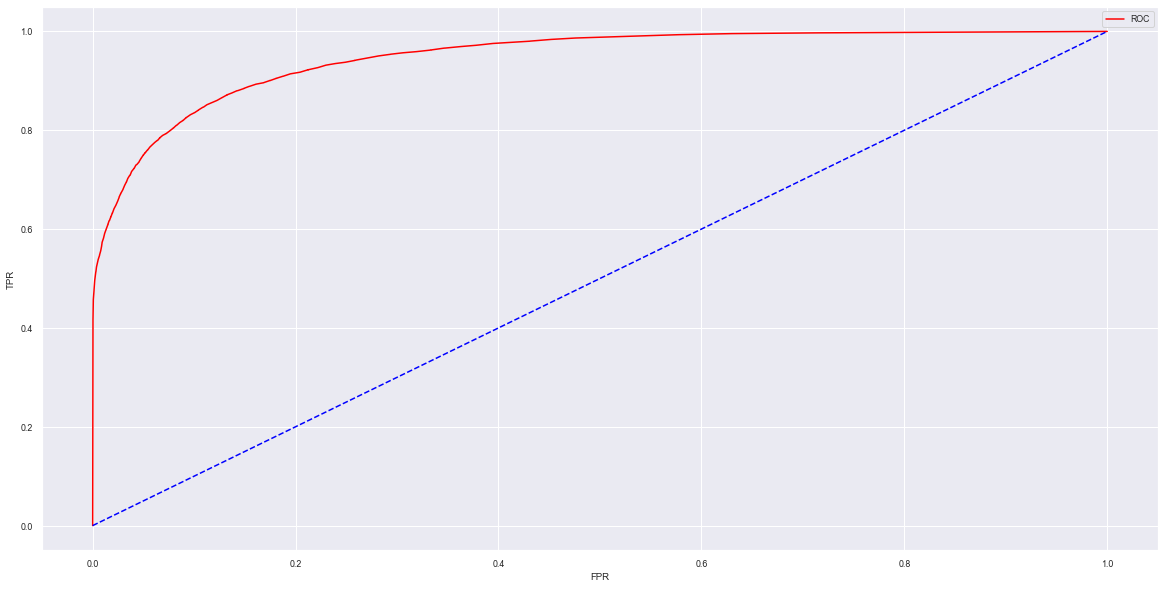


PR Curve



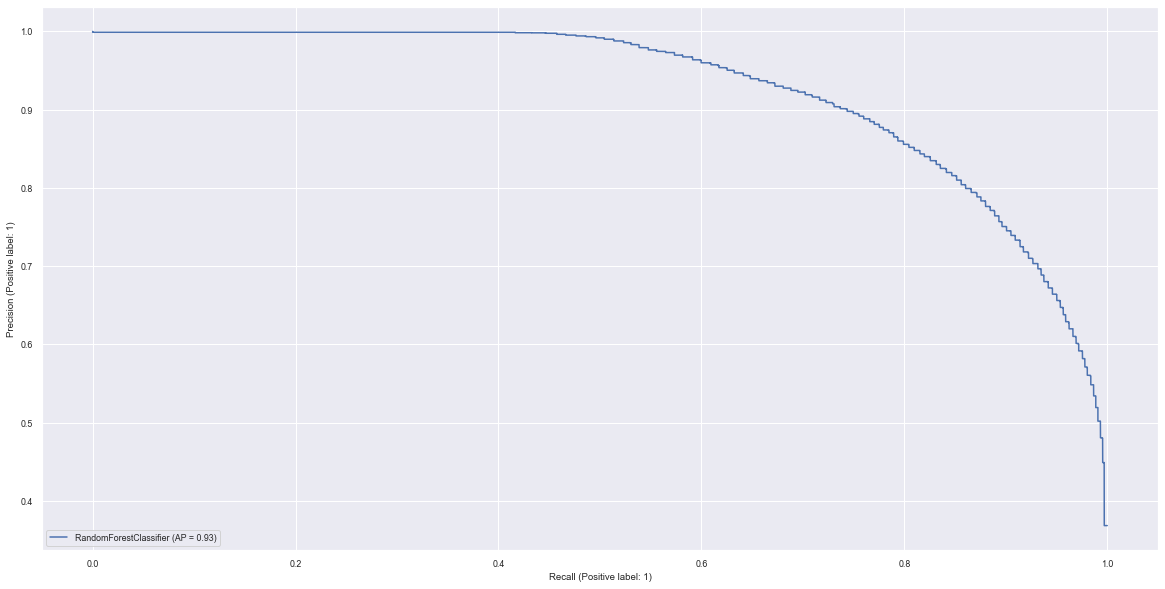

In [49]:
fprs,tprs=[],[]
for name,clf in zip(names_1,classifiers_1):
    print("\nTesting Classifier ",name)
    clf.fit(X_under, y_under)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


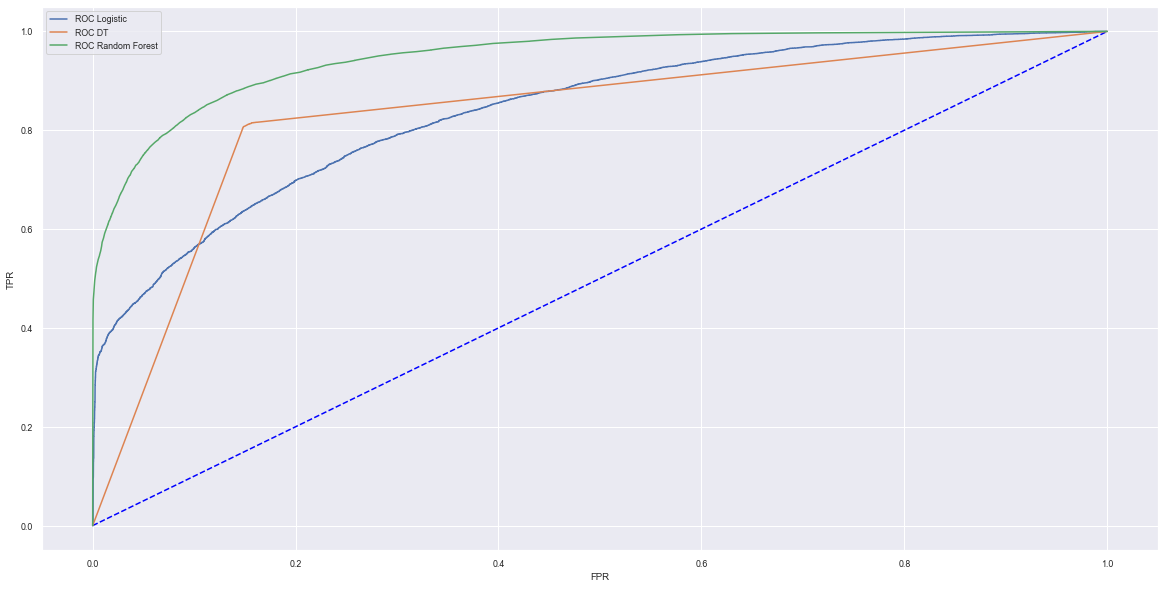

In [50]:
plot_roc_curve_many(fprs,tprs,names_1)

# **SMOTE Imbalance Technique**
**SMOTE** stands for **Synthetic Minority Oversampling Technique**. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

In [51]:
oversample = SMOTE(sampling_strategy='minority')
X_smote, y_smote = oversample.fit_resample(X_train,y_train)

For further analysis we wil only take Random Forest which is so far the best performing model


Testing Classifier : Random Forest Classifier

Classification Score 0.8792548914500135

ROC Score : 0.9481853295115145

KAPPA

0.7373596141032176

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     18853
           1       0.86      0.81      0.83     10995

    accuracy                           0.88     29848
   macro avg       0.87      0.86      0.87     29848
weighted avg       0.88      0.88      0.88     29848


Confusion Matrix

[[17369  1484]
 [ 2120  8875]]

ROC Curve



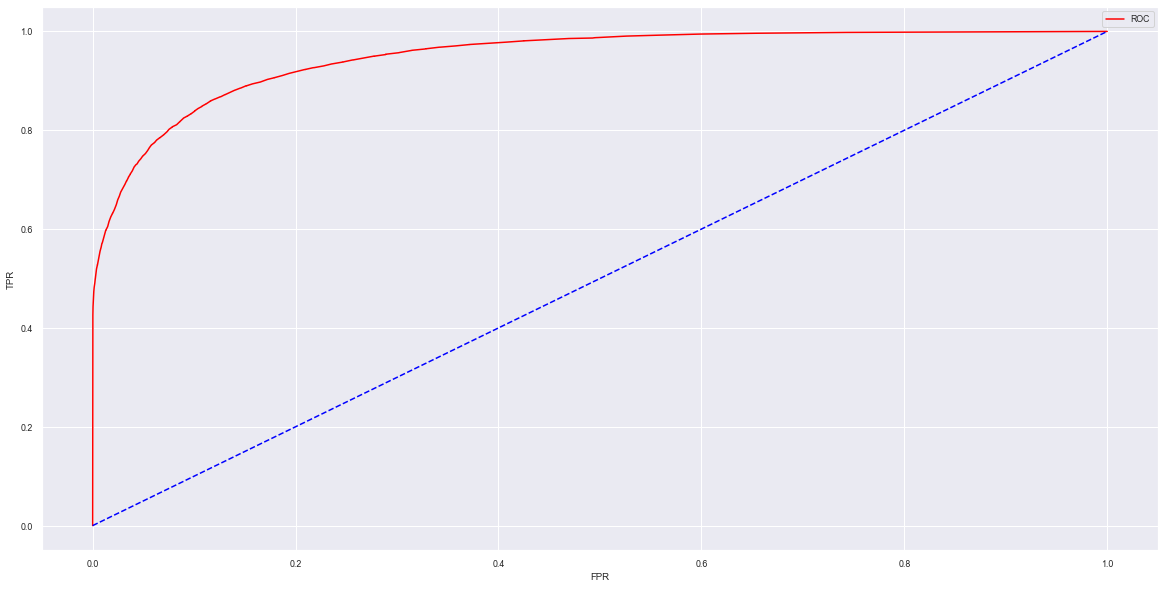


PR Curve



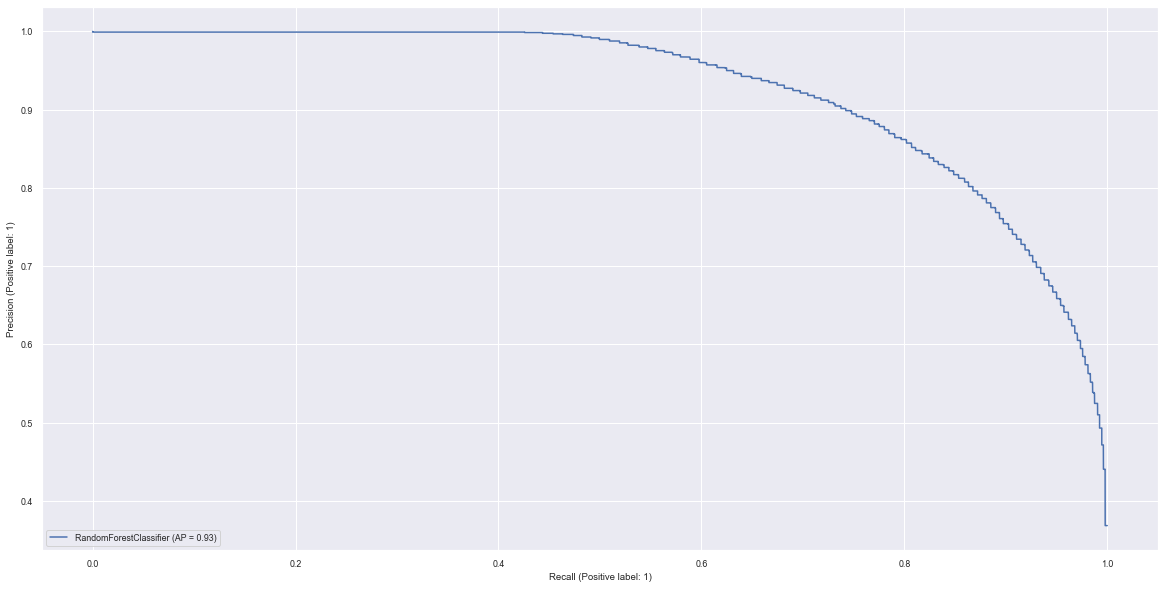

In [52]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
print("\nTesting Classifier : Random Forest Classifier")
rf.fit(X_smote, y_smote)
evaluateModel(rf)

# **Borderline Smote Imbalance Technique**
It classifies any minority observation as a noise point if all the neighbors are the majority class and such an observation is ignored while creating synthetic data (Similar to DBSCAN)

In [53]:
oversample1 = BorderlineSMOTE()
X_borderline, y_borderline = oversample1.fit_resample(X_train, y_train)
X_borderline.shape, y_borderline.shape

((112626, 20), (112626,))


Testing Classifier : Random Forest Classifier

Classification Score 0.8787188421334763

ROC Score : 0.9478546458397751

KAPPA

0.7364767455271615

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     18853
           1       0.85      0.81      0.83     10995

    accuracy                           0.88     29848
   macro avg       0.87      0.86      0.87     29848
weighted avg       0.88      0.88      0.88     29848


Confusion Matrix

[[17333  1520]
 [ 2100  8895]]

ROC Curve



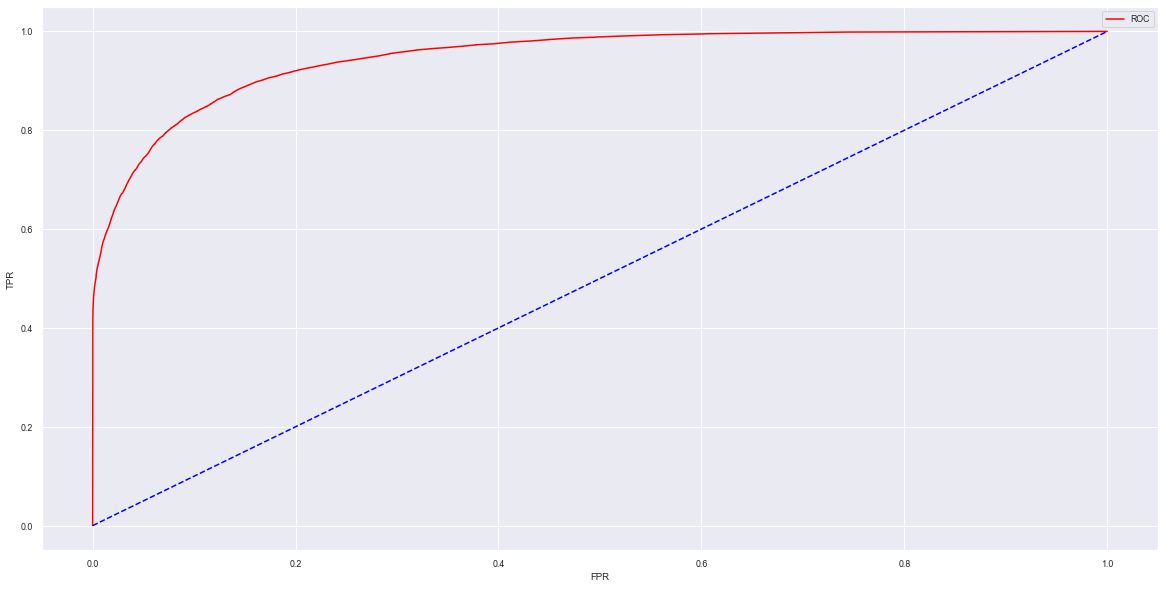


PR Curve



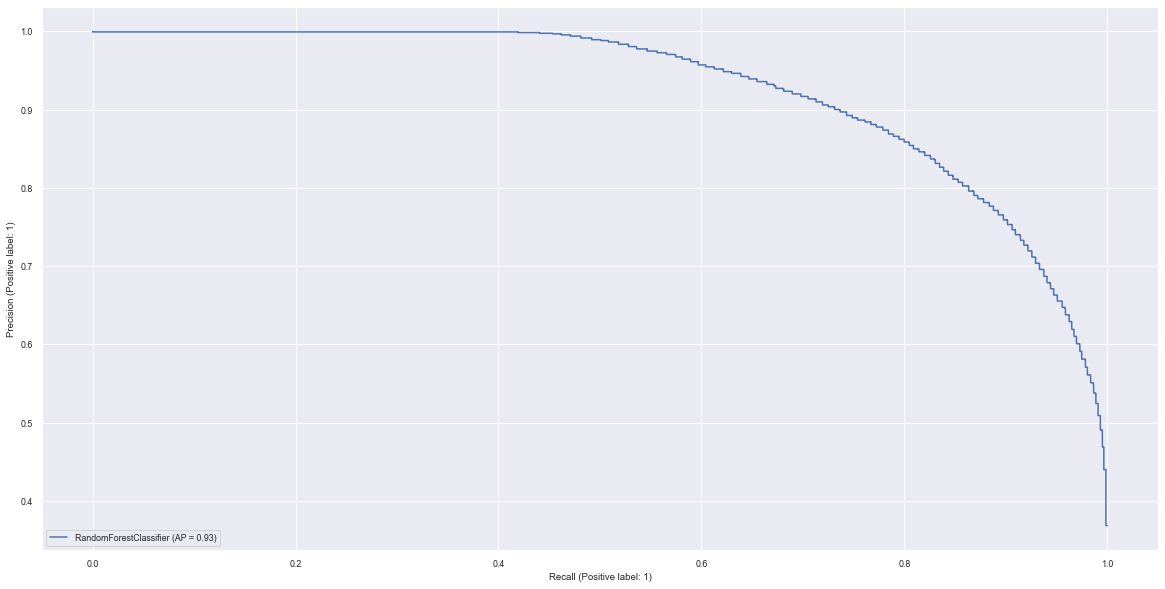

In [54]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
print("\nTesting Classifier : Random Forest Classifier")
rf.fit(X_borderline, y_borderline)
evaluateModel(rf)

# **Hyperparameter Tuning of Random Forest**
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. 

In [55]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)
print('Parameters currently in use for Random forest model:\n')
pprint(rf.get_params())

Parameters currently in use for Random forest model:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## RandomSearchCV

In [56]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [2, 57, 112, 168, 223, 278, 334, 389, 444, 500]}


In [57]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 2 fold cross validation, 
# search across 16 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 8, cv = 2, verbose=2, random_state=42, 
                               n_jobs = -1,scoring='roc_auc')


In [58]:
#Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [2, 57, 112, 168, 223,
                                                         278, 334, 389, 444,
                                                         500]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [59]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [60]:
# Make Random Forest with best found hyperparameters
rf_best = RandomForestClassifier(random_state=42, n_estimators =  500, 
                                min_samples_split= 2, min_samples_leaf= 2, 
                                max_features= 'auto', max_depth= 50, 
                                bootstrap = False)


Classification Score 0.8815666041275797

ROC Score : 0.9507371251988199

KAPPA

0.7408916583731675

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18853
           1       0.87      0.80      0.83     10995

    accuracy                           0.88     29848
   macro avg       0.88      0.86      0.87     29848
weighted avg       0.88      0.88      0.88     29848


Confusion Matrix

[[17554  1299]
 [ 2236  8759]]

ROC Curve



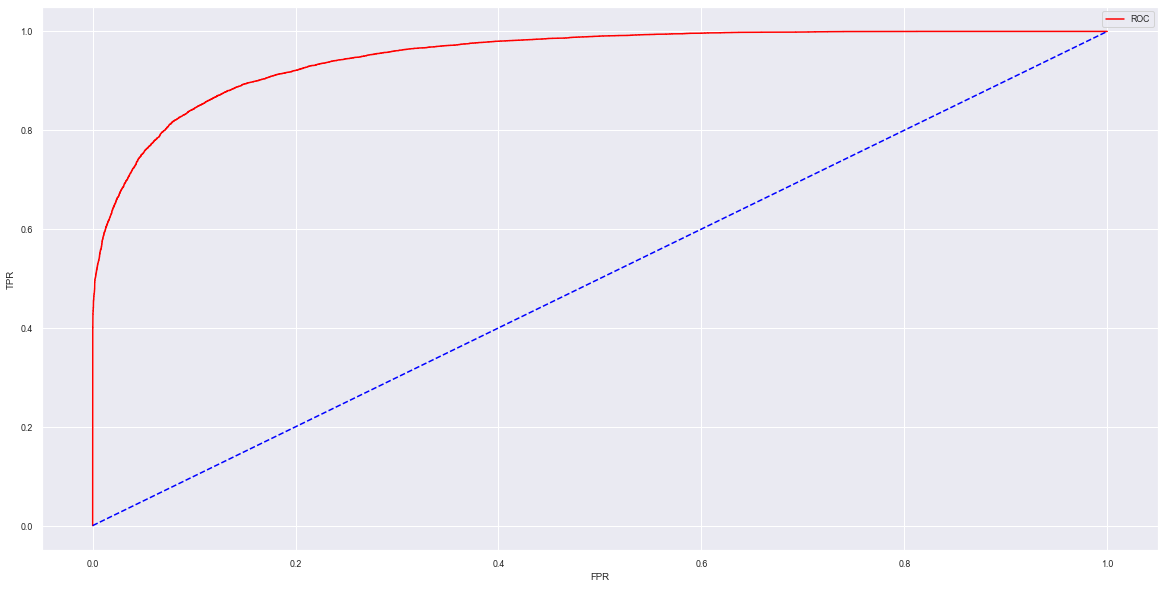


PR Curve



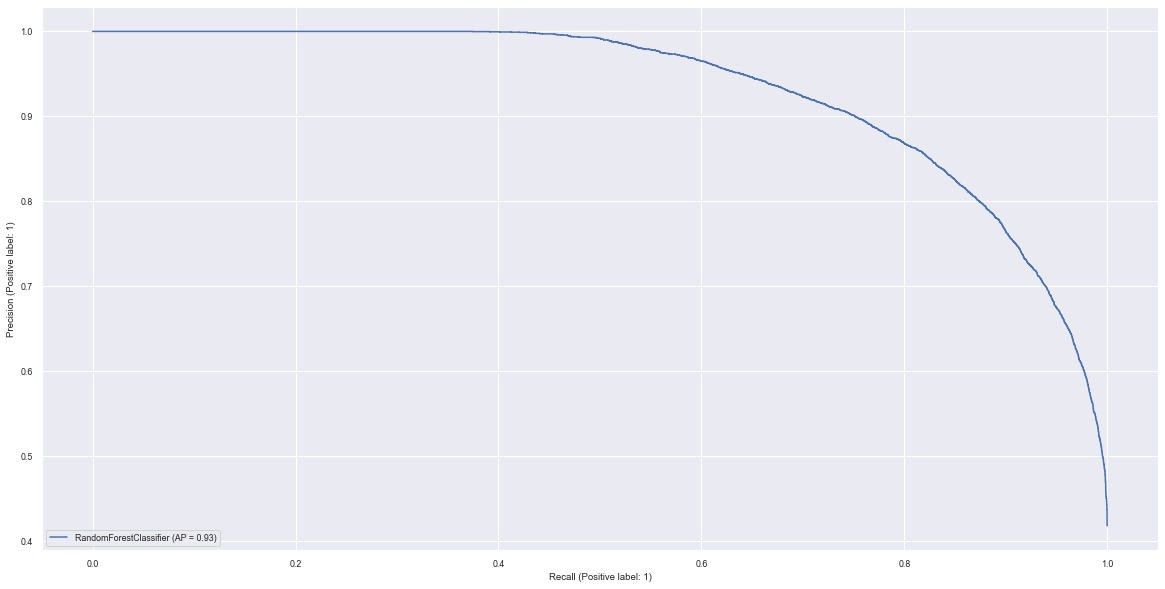

In [61]:
# train and evalute the best fit rf
rf_best.fit(X_train,y_train)
evaluateModel(rf_best)

We have tried many iteration to reach our final model the maximum variance and information explanined by the predictors is achieved by hyperparameter tunning of Rondom forest. we can increase it if we try some scalling on data

* **Scaling**
>> Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
>> #### **StandardScaler**
>> Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

>> The standard score of a sample x is calculated as:

>> `z = (x - u) / s`

>> where u is the mean of the training samples, and s is the standard deviation of the training samples or one.

In [62]:
ss = StandardScaler()

df1=df
for i in df1.columns:
    if i not in ['is_canceled']:
        df1[[i]]=ss.fit_transform(df1[[i]])


In [63]:
X_df = df1.loc[:, df1.columns != 'is_canceled']
y_df = df1['is_canceled']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df,y_df,test_size=0.25,random_state=1)



In [64]:
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89542, 20), (29848, 20), (89542,), (29848,))

In [65]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts))
frequencies

array([[    0,     1],
       [18853, 10995]], dtype=int64)

In [66]:
X_train[0:5]

array([[-0.71061889,  0.66429743, -0.78620716,  0.24789727, -0.26065863,
        -0.08157926,  2.28735989, -1.74994689,  0.84620013, -0.1815604 ,
        -0.10317951, -0.09155477, -0.58299625, -0.70759647, -0.33898986,
        -0.37317536,  1.49500965, -0.32316087, -0.25487288,  0.54066585],
       [-0.71061889, -0.29955664, -1.31023993,  0.24789727, -0.26065863,
        -0.08157926,  1.3515505 ,  0.93670639, -0.73268048, -0.1815604 ,
         1.08118754, -0.09155477, -0.58299625, -0.70759647, -0.33898986,
         2.61478026, -0.23797935, -0.23411469, -0.25487288, -0.72069411],
       [-0.71061889, -0.82359381, 17.03090686, -3.20479225, -0.26065863,
        -0.08157926, -0.52006829,  0.93670639, -2.31156109, -0.1815604 ,
        -0.10317951, -0.09155477, -0.58299625,  4.08281338, 31.85464581,
        -0.37317536,  1.49500965, -2.0150382 , -0.25487288, -0.72069411],
       [ 1.40722407,  1.06668311, -0.2621744 ,  0.24789727, -0.26065863,
        -0.08157926, -0.52006829, -0.38423147,  

In [67]:
rf_best_scalled = RandomForestClassifier(random_state=42, n_estimators =  500, 
                                min_samples_split= 2, min_samples_leaf= 2, 
                                max_features= 'auto', max_depth= 50, 
                                bootstrap = False)


Classification Score 0.6378316805146074

ROC Score : 0.7019335758887235

KAPPA

0.021161779289413984

Classification Report

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     18853
           1       1.00      0.02      0.03     10995

    accuracy                           0.64     29848
   macro avg       0.82      0.51      0.41     29848
weighted avg       0.77      0.64      0.50     29848


Confusion Matrix

[[18853     0]
 [10810   185]]

ROC Curve



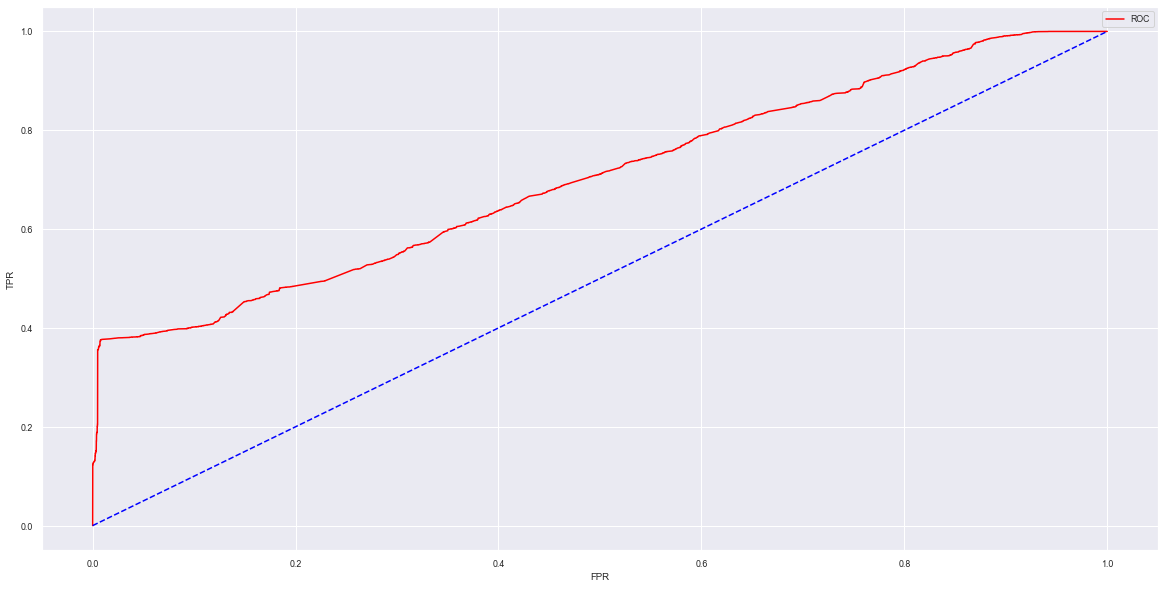


PR Curve



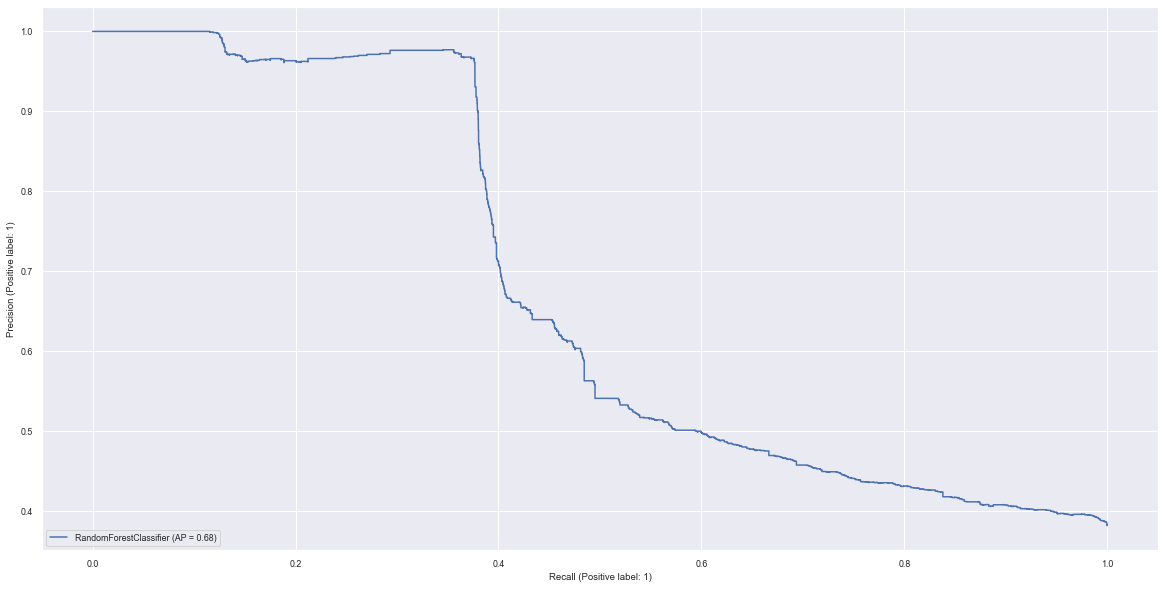

In [68]:
# train and evalute the best fit rf
rf_best_scalled.fit(X_train,y_train)
evaluateModel(rf_best)

# **Conclusion**

**Feature Importances**

In [69]:
importances = pd.DataFrame({'feature':X_df.columns,'importance':np.round(rf_best.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [70]:
importances.head(10)

importance
feature                              
lead_time                       0.171
deposit_type                    0.164
country                         0.136
adr                             0.108
market_segment                  0.080
total_of_special_requests       0.068
previous_cancellations          0.043
stays_in_week_nights            0.039
customer_type                   0.032
assigned_room_type              0.031

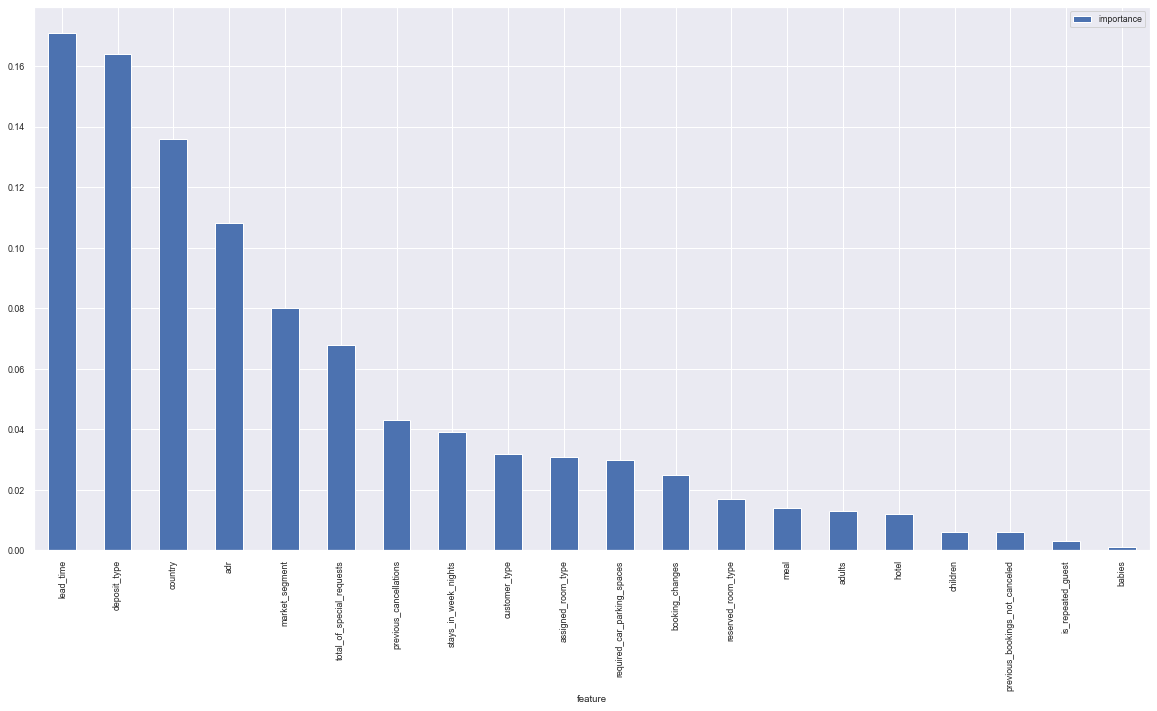

In [71]:
imp = importances.plot.bar()